## Simple example of training a model by Scikit_learn  
Including dataset loading, spliting the data set, and model training.

### Dataset Loading
First of all we have to load the dataset and here we use `iris`, which is one of the most popular ready-to-use data set that we have in sklearn

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of X:\n", X[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### Spliting the Dataset
  
Here `train_test_split` will use for spliting the data between the train and the test parts.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


### Model training  
There are different types of algorithems in Scikit-Learn, which for this special example I wnt to use `KNN`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_KNN = KNeighborsClassifier(n_neighbors = 3)
classifier_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier_KNN.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [ ]:
# Providing sample data and the model will make prediction out of that data
sample = [[1, 1, 3, 2], [2, 4, 3, 5], [5, 5, 3, 2]]
preds = classifier_KNN.predict(sample)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)

Predictions: ['versicolor', 'versicolor', 'setosa']


For retaining the model for future purposes we use `.dump` and `.load` from `joblib` package. 

In [ ]:
import joblib
joblib.dump(classifier_KNN, 'iris_classifier_knn.joblib')

['iris_classifier_knn.joblib']

For upload the model we use `joblib.load` as follow

In [8]:
import joblib

joblib.load('iris_classifier_knn.joblib')

KNeighborsClassifier(n_neighbors=3)

In [7]:
classifier_KNN.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [20]:
y_pred = classifier_KNN.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


## Preprocessing the Data  
Since we are dealing with large amounts of data in the raw form of data, we need to prepare it and transform it into appropriate and meaningful data before using it as input to the machine learning algorithm. This process is called data preprocessing.  

Scikit-Learn uses the `preprocessing` package for this purpose. The `sklearn.preprocessing` package provides several common converter functions and classes for converting feature vectors and raw data into data usable by estimators.

In [ ]:
import numpy as np
from sklearn import preprocessing

### Binarizer

In [ ]:
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)

data_binarized = preprocessing.Binarizer(threshold = 0.5).transform(input_data)
# Threshold will help us to categorise the values between 0 and 1. 
# This means that for the value higher than threshold we consider 1 
# for lower values
print(f"Binarized Data: {data_binarized}")

Binarized Data: [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]]


### Normalizer

we have two type of the normalizer:
 * l1: the sum of the absolute values in each line remains at most one.
 * l2: The sum of squares in each row should remain at most one

In [ ]:
input_data = np.array(
   [[2.1, -1.9, 5.5],
   [-1.5, 2.4, 3.5],
   [0.5, -7.9, 5.6],
   [5.9, 2.3, -5.8]]
)

data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')

print(f"L1 normalized data:\n {data_normalized_l1}")
print(f"L2 normalized data:\n {data_normalized_l2}")


L1 normalized data:
 [[ 0.22105263 -0.2         0.57894737]
 [-0.2027027   0.32432432  0.47297297]
 [ 0.03571429 -0.56428571  0.4       ]
 [ 0.42142857  0.16428571 -0.41428571]]
L2 normalized data:
 [[ 0.33946114 -0.30713151  0.88906489]
 [-0.33325106  0.53320169  0.7775858 ]
 [ 0.05156558 -0.81473612  0.57753446]
 [ 0.68706914  0.26784051 -0.6754239 ]]


## Scikit_learn.SVM  
Support Vector Machine (`SVM`) is one of the powerful supervised classification methods in scikit learn that is used for `building the model`. SVM is flexible in high dimensions and widely used in classification problems.  

The most important goal of SVM is to divide the data set into a number of classes in order to obtain the maximum marginal hyperplane (MMH), which is done in two steps.  

* The support vector machine first generates hyperplanes that divide the points correctly.  
* Then, among its hyperplanes, a hyperplane will be choosed that separates the points in the best possible way.
  
<img align="left" src="./docs/images/svm.jpg"     style=" width:380px; padding: 10px 20px; " >   
  
  
  Some important features of SVM are as follows:  
`Support Vectors`: These are points that are closer to the hyperplane. Support vectors are helpful in identifying the separating lines.  
`HyperPlane`: A plane that divides points into different classes.  
`Margin`: The empty distance between the border points of two classes or support vectors is called margin or edge.  

### Scikit_learn.SVM.SVC  
Scikit-learn has three classes named SVC, NuSVC and LinearSVC that can perform multiclass classification (multivlass_class). Here we focus on the classification through `SVC`.

Here firstly we define a set of features that have a value as a target and for simplicity we choose the binary case

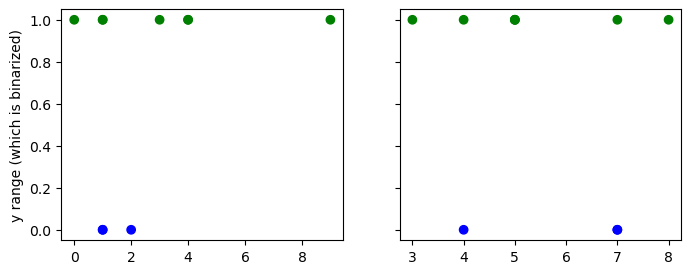

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

X = np.random.randint(0, 10, (10,2))
y = np.random.randint(0, 2, (10,))

# Define a colormap with colors for 0 and 1
colors = ['blue', 'green']
cmap = ListedColormap(colors)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)  # Use 'axs' for subplots

for i in range(len(axs)):
    axs[i].scatter(X[:, i], y, c=y, cmap=cmap)

axs[0].set_ylabel("y range (which is binarized)")

plt.show()


Spliting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6, 2)
(4, 2)
(6,)
(4,)


Here we want to train our model base on the SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.metrics import PredictionErrorDisplay
SVCClf = SVC(kernel = 'rbf',gamma = 0.001, shrinking = False,)
SVCClf.fit(X_train, y_train)# method is used to train machine learning models

SVC(gamma=0.001, shrinking=False)

In [ ]:
y_pred = SVCClf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [ ]:
y_pred, y_test

(array([1, 1, 1, 1]), array([1, 0, 1, 1]))

And we can predict some special test

In [ ]:
sample = [[1, 5], [2, 5], [5, 5], [2, 5]]
preds = SVCClf.predict(sample)
preds

array([1, 1, 1, 1])

The value of the `Kernel` inside the `SVC` would be change. Choice of the kernel function depends on the nature of our data and the problem we're trying to solve.  Kernel is used for classification and represent a maping from a dimension to a higher dimension.
1) `Linear Kernel` (‘linear’):  
$$
  \langle x|x^{\prime} \rangle
$$
* Use this kernel when your data is linearly separable, which means the classes can be separated by a straight line or plane.
* It is computationally efficient and often a good choice as a starting point.  

2) `Polynomial Kernel` (‘poly’):  
$$
  (\gamma \langle x|x^{\prime} \rangle +r)^d
$$
* Use this kernel when your data is not linearly separable but might be separable in a higher-dimensional space.
* The degree parameter (d) controls the degree of the polynomial. Higher degrees can capture more complex relationships but can also lead to overfitting.
* Where r is specified by `coef0`

3) `Radial Basis Function (RBF) ` (‘rbf’):
$$
  (-\gamma ||x-x^{\prime}||^2 )
$$
* The RBF kernel is very versatile and often a good choice when we don't know the structure of your data.
* Radial Kernel is used for mapping to the infinit dimension.
* It can model non-linear decision boundaries effectively.
* The gamma parameter controls the shape of the decision boundary. Smaller values make the boundary more flexible, while larger values make it more rigid.  

4) `Sigmoid Kernel `(‘sigmoid’):
$$
  (\gamma \langle x|x^{\prime} \rangle +r)
$$
* Use this kernel when your data has a sigmoid (S-shaped) decision boundary.
* It is less commonly used compared to linear, polynomial, and RBF kernels.
* Where r is specified by `coef0`


5) `Precomputed  `  (‘precomputed’):  
We can also define our own custom kernel function if none of the built-in kernels suits our problem. Custom kernels allow you to incorporate domain knowledge into our SVM.
Here we start to define a Kernel as a RBF and we want use it in our sample. then we want to compare it with the `rbf` kernel.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# Make random dataset
X = np.random.randint(0, 10, (10,2))
y = np.random.randint(0, 2, (10,))
# Spliting data(test and train)
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4)

`Precomputed Kernel`

In [ ]:
# Custom RBF kernel function
def custom_rbf_kernel(X, Y):
    gamma = 0.1  # We can adjust this parameter
    pairwise_sq_dists = np.sum(X**2, axis=1)[:, np.newaxis] + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * pairwise_sq_dists)

# Create an SVC classifier with the custom kernel
from sklearn.svm import SVC
clf = SVC(kernel=custom_rbf_kernel)

# Fit the classifier to your data
clf.fit(X_train, y_train)

# You can now use clf for predictions and other SVM tasks


SVC(kernel=<function custom_rbf_kernel at 0x7f5d910a5510>)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


`rbf kernel`

In [ ]:
CClf = SVC(kernel ='rbf',gamma = 0.1,)
CClf.fit(X_train, y_train)

SVC(gamma=0.1)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


### Oth example

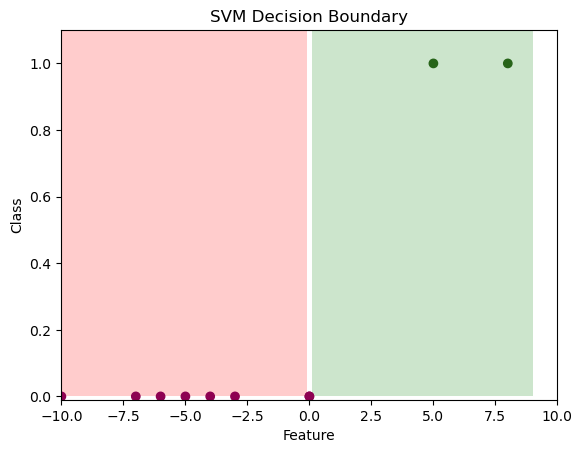

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Now we try a new dataset which consist of a feature and a class 
# Our feature consist of 10 random numbers between -10 and 10
# the formation of the class is base on this rule: We assume that we have a H(x) that for x>0 the value of the H=1 and for x<=0 the value of the H=0
X = np.random.randint(-10, 10, (10,))
y = np.array([1 if x > 0 else 0 for x in X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Create an SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Create a mesh grid to visualize the decision boundary
x_min, x_max = X.min() - 1, X.max() + 1
# x_min and x_max represent the minimum and maximum values of the first feature
x_range= np.linspace(x_min, x_max, 100) 
# This grid covers the entire range of feature values for both the first and second features, with a step size of 0.01 between points on the grid
x_range = x_range.reshape(-1,1)
y_pred = clf.predict(x_range)

# Define a threshold
threshold = 0.0

# Split the data into two parts based on the threshold
data_before_threshold = x_range [ x_range < threshold]
data_after_threshold = x_range [x_range >= threshold]

# Create a histogram for data before the threshold (use color 'blue')
plt.hist(data_before_threshold, bins = 20, color='red', alpha=0.2, label='Before Threshold')

# Create a histogram for data after the threshold (use color 'green')
plt.hist(data_after_threshold, bins = 20, color='green', alpha=0.2, label='After Threshold')

plt.scatter(X, y, c=y, cmap=plt.cm.PiYG, marker='o')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.title('SVM Decision Boundary')
plt.xlim(-10.0,10.0)
plt.ylim(-0.01, 1.1)
plt.show()

In [27]:
X_train.shape

(8, 1)

### 1st example

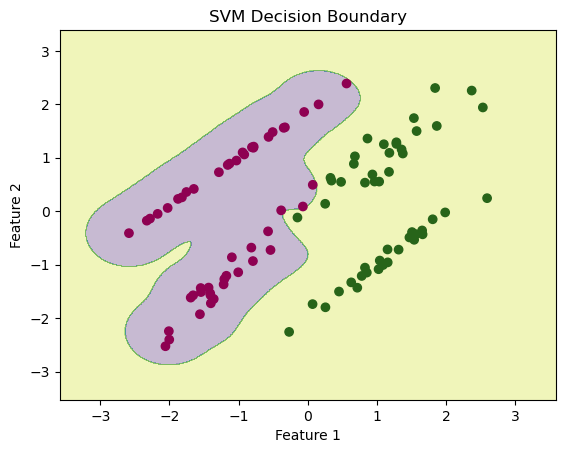

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a dataset for classification
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_sample: This argument specifies the total number of samples (data points) 
# n_features: This argument specifies the number of features in our dataset.
# n_informative: Informative features are the features that actually contribute to the classification problem. Here both of our feature are informative.
# n_redundant:  Redundant features are additional features that are generated as random linear combinations of informative features.
# random_state: By setting it to 42, you ensure that if you run the code again with the same parameters, you will get the same dataset.



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create an SVM classifier
clf = SVC(kernel='rbf',gamma = 8)
clf.fit(X_train, y_train)
# we chose th Radial basis Function Kernel for better classification with Gamma = 8



# Create a mesh grid to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# x_min and x_max represent the minimum and maximum values of the first feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# y_min and y_max represent the minimum and maximum values of the second feature
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# This grid covers the entire range of feature values for both the first and second features, with a step size of 0.01 between points on the grid



# Make predictions on the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# This line uses the trained SVM classifier (clf) to make predictions on all the points in the mesh grid.
Z = Z.reshape(yy.shape)


# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.3)
# The plt.contourf function creates regions of different colors corresponding to the predicted class labels in the Z array. 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PiYG)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


In [ ]:
X_train.shape

(80, 2)

In [ ]:
y_train.shape

(80,)

### 2nd example
in the second step we define x as a function of sin()  


`Data set`

In [ ]:
import random
import numpy as np
from math import pi, sin

Hx = []
for angle in range(int(5 * pi)):
    val = sin(angle)
    Hx.append(val)

y = []
for _ in(Hx):
    if _ > 0:
        psi = 1
    else:
        psi = 0
    y.append(psi)

print(f' a set of random values of x {Hx}, and the exception values for H base on the x value {y}')

 a set of random values of x [0.0, 0.8414709848078965, 0.9092974268256817, 0.1411200080598672, -0.7568024953079282, -0.9589242746631385, -0.27941549819892586, 0.6569865987187891, 0.9893582466233818, 0.4121184852417566, -0.5440211108893698, -0.9999902065507035, -0.5365729180004349, 0.4201670368266409, 0.9906073556948704], and the exception values for H base on the x value [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]


`Spliting data to train and test`

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(Hx)
Y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split (X,Y,test_size = 0.4)
# Assuming X_train is your training data with a single feature
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9, 1)
(6, 1)
(9,)
(6,)


`Training the data`

In [ ]:
from sklearn.svm import SVC
SVCClf = SVC(kernel='sigmoid')
SVCClf.fit(X_train, y_train)


SVC(kernel='sigmoid')

`Predicting`

In [ ]:
from sklearn import metrics
y_pred = SVCClf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### 3rd example
In this step we assume that we have a set of H that the value of h has a special effect on the y result
$$
  H (h) = (\sigma^x \sigma^x - h \sigma^z)
$$
for simplicity we consider the y=|0> for h<0 and y=|1> for h>0

In [ ]:
import quimb as qu

x_pauli = qu.gen.operators.pauli('X', dim=2).real
z_pauli = qu.gen.operators.pauli('Z', dim=2).real
I = qu.gen.operators.pauli('I',dim=2).real

H_x =[]
a = x_pauli & x_pauli #Tensor product
b =z_pauli & I #Tensor product 
for h in range(-20, 21):
    h /= 10.0  # Convert the loop variable to the desired step size of 0.1
    H_x.append(a-h*b)

y = []
for h in range(-20, 21):
    h /= 10.0 
    if h > 1 or h<-1:
        psi = 1
    else:
        psi = 0
    y.append(psi)

print(f' a set of random values of x {H_x}, and the exception values for H base on the x value {y}')


 a set of random values of x [[[ 2.  0.  0.  1.]
 [ 0.  2.  1.  0.]
 [ 0.  1. -2.  0.]
 [ 1.  0.  0. -2.]], [[ 1.9  0.   0.   1. ]
 [ 0.   1.9  1.   0. ]
 [ 0.   1.  -1.9  0. ]
 [ 1.   0.   0.  -1.9]], [[ 1.8  0.   0.   1. ]
 [ 0.   1.8  1.   0. ]
 [ 0.   1.  -1.8  0. ]
 [ 1.   0.   0.  -1.8]], [[ 1.7  0.   0.   1. ]
 [ 0.   1.7  1.   0. ]
 [ 0.   1.  -1.7  0. ]
 [ 1.   0.   0.  -1.7]], [[ 1.6  0.   0.   1. ]
 [ 0.   1.6  1.   0. ]
 [ 0.   1.  -1.6  0. ]
 [ 1.   0.   0.  -1.6]], [[ 1.5  0.   0.   1. ]
 [ 0.   1.5  1.   0. ]
 [ 0.   1.  -1.5  0. ]
 [ 1.   0.   0.  -1.5]], [[ 1.4  0.   0.   1. ]
 [ 0.   1.4  1.   0. ]
 [ 0.   1.  -1.4  0. ]
 [ 1.   0.   0.  -1.4]], [[ 1.3  0.   0.   1. ]
 [ 0.   1.3  1.   0. ]
 [ 0.   1.  -1.3  0. ]
 [ 1.   0.   0.  -1.3]], [[ 1.2  0.   0.   1. ]
 [ 0.   1.2  1.   0. ]
 [ 0.   1.  -1.2  0. ]
 [ 1.   0.   0.  -1.2]], [[ 1.1  0.   0.   1. ]
 [ 0.   1.1  1.   0. ]
 [ 0.   1.  -1.1  0. ]
 [ 1.   0.   0.  -1.1]], [[ 1.  0.  0.  1.]
 [ 0.  1.  1.  0.]
 [ 0.  1

`Spliting data`

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(H_x)
ux = X.reshape(X.shape[0],  -1)
Y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split (ux,Y,test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 16)
(17, 16)
(24,)
(17,)


In [ ]:
X_test[0]

array([-0.8,  0. ,  0. ,  1. ,  0. , -0.8,  1. ,  0. ,  0. ,  1. ,  0.8,
        0. ,  1. ,  0. ,  0. ,  0.8])

Invesigating the degenercy could be useful

In [ ]:
h2=-0.5
Ham2=qu.ham_ising(10,1,h2,cyclic=True)
energies2, vectors2 = np.linalg.eigh(Ham2)
energies2,np.sort(energies2)-energies2

(array([-3.19622661, -3.15687576, -2.88335768, ...,  2.88335768,
         3.15687576,  3.19622661]),
 array([0., 0., 0., ..., 0., 0., 0.]))

`Training data`

In [ ]:
from sklearn.svm import SVC
SVCClf = SVC(kernel='poly')
SVCClf.fit(X_train, y_train)

SVC(kernel='poly')

`Prediction`

In [ ]:
from sklearn import metrics
y_pred = SVCClf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### 4th example
In this step we want to extend the 3rd example and have a real chain.  
In fact, we have a chain of particles that their hamiltonian is like this.  
$$
  H (h) = \sum_{i=1}^{N-1}\sigma^x \sigma^x + h \sum_{i=1}^{N}\sigma^z
$$
- First we make this Hamiltonian with 10 sites which means that $N=10$.  
- Then we make a set of Igenstates for different values of $h$ inside the Hamiltonian.
- Following that  we have to put a lable on the igenstates so that if $0<h<1$ we put lable $-1$ and if $1<h<2$ then igen state has a lable $1$. 
- Now we can investigate this problem with different approaches:  
  1- So our Dataset is ready and consists of $h$ between $[0,2]$ as $x$ and Igenstates which has $-1$ or $1$ labels as $y$. (for this case we can use linear kernel for train a model)  
  2- Producing a set of Igenstates based on the value of $h$ that have $n$ dimension as $x$ that has $n$ features and Igenstates labels which has  $-1$ or $1$ values as $y$. (for this case we can use rbf kernel because it is used for n dimension and also precomputed kernel)

`Make dataset`

In [11]:
import numpy as np
import quimb as qu
from sklearn.decomposition import PCA


lst_eigenstate_minus1 = [] # this is a list of eigen states based on h between 0 and 1
lst_eigenstate_plus1 = [] # this is a list of eigen states based on h between 1 and 2
lst_y = [] # this is a list of h between 0 and 2 with step 0.1
lst_h = [] # here we just focus on two phase -1 abd 1
for h in range(20):
    h /= 10.0 # Convert the loop variable to the desired step size of 0.1
    lst_y.append(h) 
    # this for one of our phaes when h is less than one
    if h < 1.0:
        H = qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h) # in this way we have a Heisenburg Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H) # the value of the eigenvalue and formation of the eigenstate in this way is achivable
        pca = PCA(n_components=3) # PCA is used for reduction the dimension of the array 
        pca.fit(eigenvectors)
        lst_eigenstate_minus1.append(np.array(eigenvectors).flatten()) # by .flatten we make a 1 dimension of features
        '''lst_eigenstate_minus1.append(pca.singular_values_)'''
        '''lst_eigenstate_minus1.append(pca.explained_variance_ratio_)'''
        lst_h.append(-1)
    # this is for another phase when h is grater than one
    else:
        H = qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h) # in this way we have a Heisenburg Hamiltonian
        eigenvalues, eigenvectors = np.linalg.eigh(H) # the value of the eigenvalue and formation of the eigenstate in this way is achivable
        pca = PCA(n_components=3) # PCA is used for reduction the dimension of the array 
        pca.fit(eigenvectors)
        lst_eigenstate_plus1.append(np.array(eigenvectors).flatten()) # by .flatten we make a 1 dimension of features
        '''lst_eigenstate_plus1.append(pca.singular_values_)'''
        '''lst_eigenstate_plus1.append(pca.explained_variance_ratio_)'''
        lst_h.append(1)

# by using tuple we attach labels

phases = [
    ("phase_minus_one", lst_eigenstate_minus1),
    ("phase_plus_one", lst_eigenstate_plus1)
]

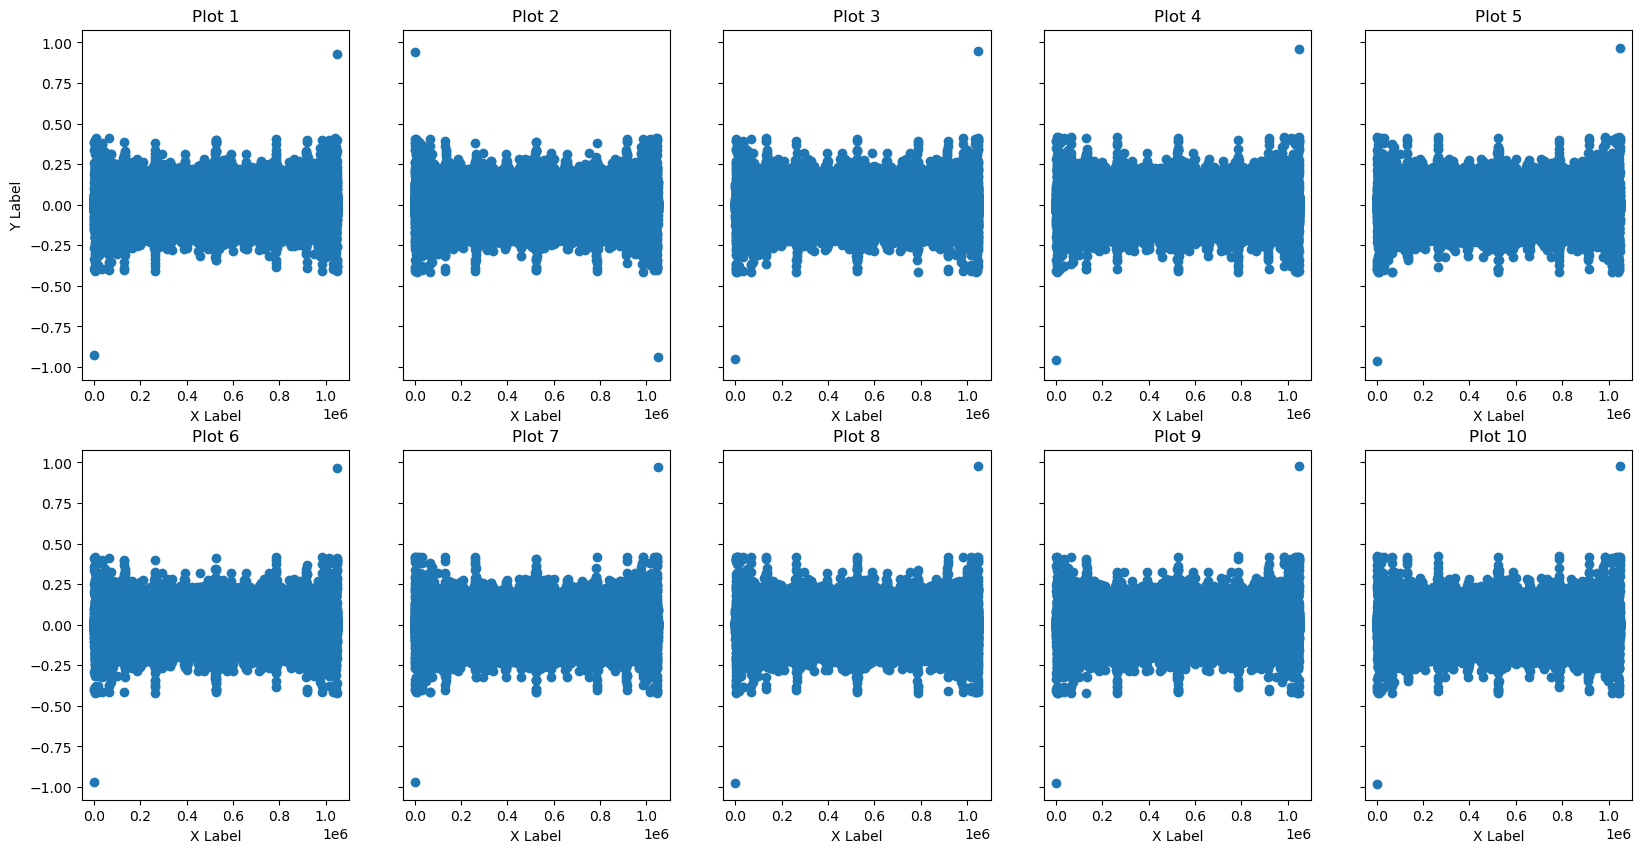

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharey=True)

for i in range(len(lst_eigenstate_plus1)):
    row, col = divmod(i, 5)  # Calculate the row and column indices for subplots
    ax[row, col].scatter(np.arange(len(lst_eigenstate_plus1[i])), lst_eigenstate_plus1[i])
    ax[row, col].set_xlabel("X Label")  # Set the x-axis label
    ax[row, col].set_title(f"Plot {i + 1}")  # Set a title for each subplot

ax[0, 0].set_ylabel("Y Label")  # Set the y-axis label for the first subplot

for i in range(len(lst_eigenstate_plus1), 2 * 5):
    row, col = divmod(i, 5)
    fig.delaxes(ax[row, col])

plt.show()

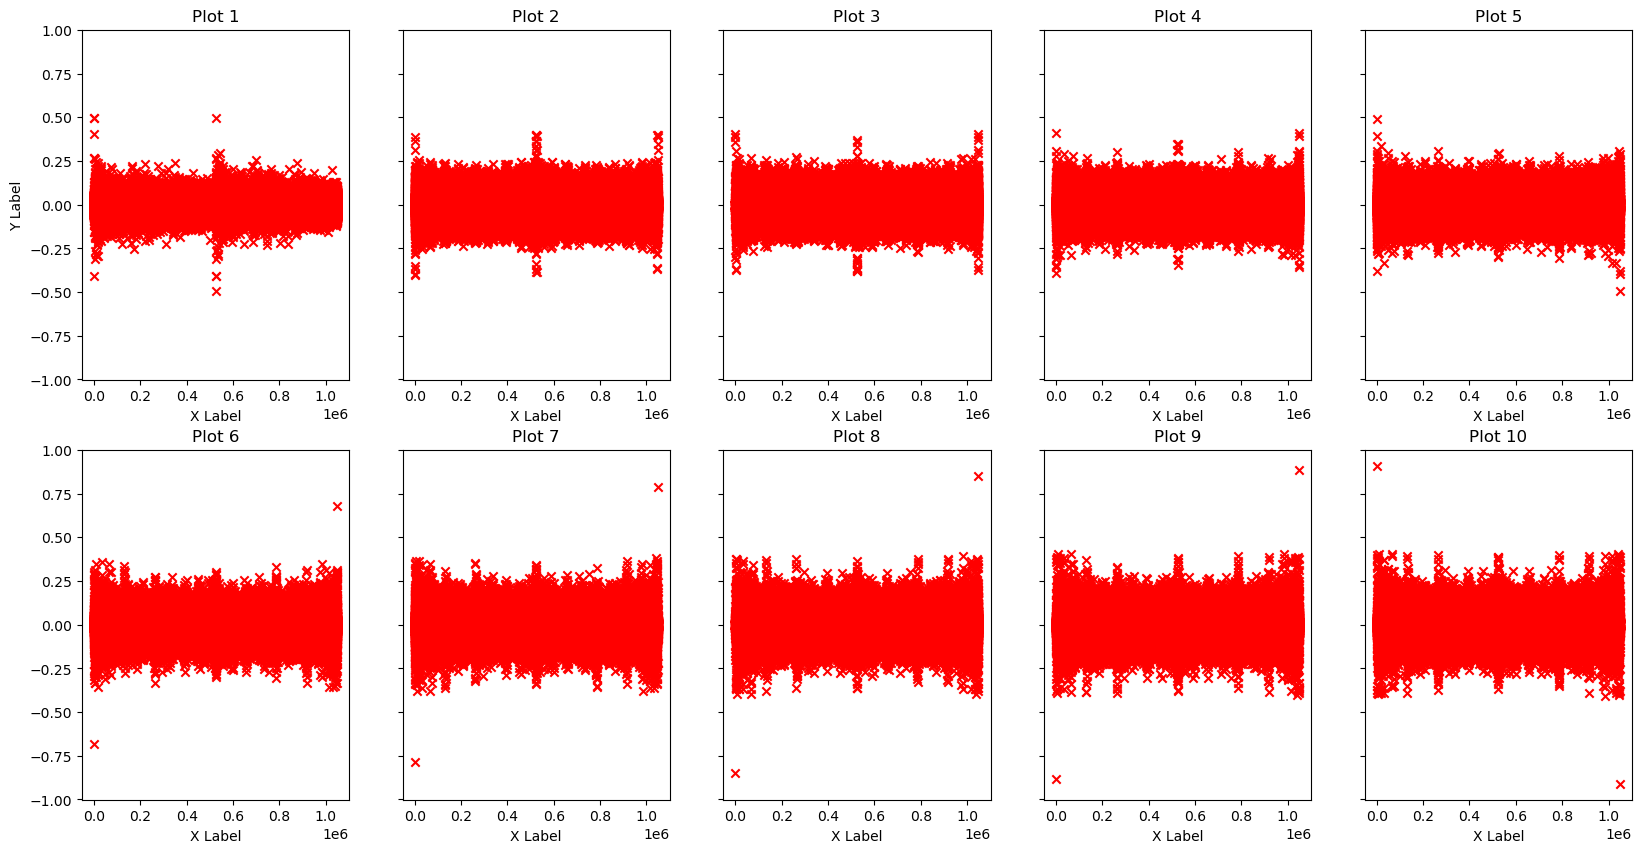

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharey=True)

for i in range(len(lst_eigenstate_minus1)):
    row, col = divmod(i, 5)  # Calculate the row and column indices for subplots
    ax[row, col].scatter(np.arange(len(lst_eigenstate_minus1[i])), lst_eigenstate_minus1[i],color='red', marker='x')
    ax[row, col].set_xlabel("X Label")  # Set the x-axis label
    ax[row, col].set_title(f"Plot {i + 1}")  # Set a title for each subplot

ax[0, 0].set_ylabel("Y Label")  # Set the y-axis label for the first subplot

for i in range(len(lst_eigenstate_minus1), 2 * 5):
    row, col = divmod(i, 5)
    fig.delaxes(ax[row, col])

plt.show()

In [10]:
X_train=X_train = np.linspace(0,1,20)
X_train.reshape(20,1).shape
y_train.shape

(20,)

In [75]:
for label, value in phases:
    print(f"{label}: {len(value)}")

phase_minus_one: 10
phase_plus_one: 10


Here we have a large volume of data that we have to reduce them in order to have a meaningful modeling

`Splitting the dataset`

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = np.array(lst_eigenstate_minus1+lst_eigenstate_plus1) # change to numpy array
y_value = np.array(lst_h) # inside the variable for y_value we can put lst_y or lst_h
label_encoder = LabelEncoder() # the value of the y is float so we have to have such transformation
y = label_encoder.fit_transform(y_value)

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4)
# Assuming X_train is your training data with a single feature
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 1048576)
(8, 1048576)
(12,)
(8,)


`Training the data`

for training the dtat by `SVC` we have to consider that the dimension of our x_train is $12 \times 1$ and our y_train is $12 \times 1024 \times 1024$

In [77]:
from sklearn.svm import SVC
# Create an SVM classifier
clf = SVC(kernel='rbf',gamma=8)
clf.fit(X_train,y_train)

SVC(gamma=8)

`Prediction`

In [78]:
from sklearn import metrics
y_pred = clf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.25


In [81]:
y_test,y_pred

(array([1, 0, 1, 1, 0, 1, 1, 1]), array([0, 0, 0, 0, 0, 0, 0, 0]))

### 5th example
In this step, we are going to investigate a problem that is closed to the rela problem in particulare its `Precomputed Kernel`
    
`Dataset`  
The data set that we consider here for x is a range between 0 and 2 and for y is -1 or 1 with a condition.  
  
`Model`  
The model is SVC which its `kernel` is precomputed whereas we can use the linear, poly or rbf kernel.  
  
`Precomputed Kernel`  
For making the kernel we need to calculate the eigenstate of Hamiltonian and then we have calculate their inner product. The Hamiltonian that we have is a Heisenberg Hamiltonian like this:
$$
  H (h) = \sum_{i=1}^{N-1}\sigma^x \sigma^x + h \sum_{i=1}^{N}\sigma^z
$$
- First, we are going to show the formation of the kernel that we have to use for the case that $H=H(h)$. For each value of $h$ we have a $H$ that produce a special value of state that we can calculate the kernel for that between neighbors and a single point and other points.
- Second we define the precomputed kernel by two function `heis_kernel` and `heis_kernel_matrix`.
- Third make a model by `SVD`.
- Finally, prediction.

`kernel formation`

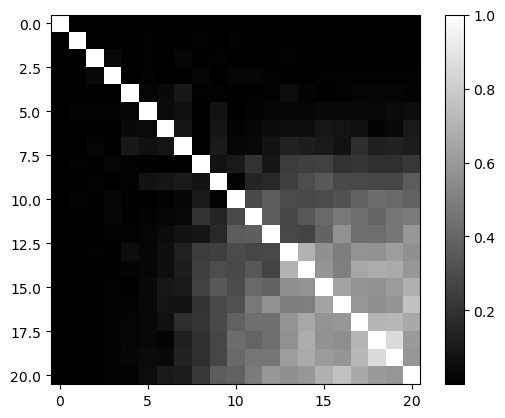

In [35]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt

lst_kernel=[]
for _ in range(0,21):
    h1=_/20
    Ham1=qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h1)
    energies1, vectors1 = np.linalg.eigh(Ham1)
    gs1 = vectors1[0]
    for _ in range(0,21):
        h2=_/20
        Ham2=qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h2)
        energies2, vectors2 = np.linalg.eigh(Ham2)
        gs2 = vectors2[0]
        lst_kernel.append(np.abs(gs1.H@gs2)**2)


kernel= np.array(lst_kernel)
re_kernel = kernel.reshape(21,21) # we reshape the arrayes to a square matrix
re_kernel.shape

plt.imshow(re_kernel, cmap='gray') # now we plot the kernel between different neighbors base the  intensity and their value
plt.colorbar()
plt.show()

`precomputed kernel,and model`

In [40]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Make dataset
X = np.linspace(0,1,40)
Y = np.sign(X - 0.5)

X = X.reshape(-1,1)

# Spliting the dataset
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size=0.4)

def heis_kernel(h1,h2):
    H1 = qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h1) # in this way we have a Heisenburg Hamiltonian
    H2 = qu.gen.operators.ham_heis(n=10, j=(1.0,0.0,0.0),b=h2) # in this way we have a Heisenburg Hamiltonian
    eigenvalues1, eigenvectors1 = np.linalg.eigh(H1) #
    eigenvalues2, eigenvectors2 = np.linalg.eigh(H2) #
    gs1 = eigenvectors1[0]
    gs2 = eigenvectors2[0]
    return np.abs(gs1.H @ gs2)**2

def heis_kernel_matrix(X1,X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            print(x1[0],x2[0])
            gram_matrix[i, j] = heis_kernel(x1[0], x2[0])
    return gram_matrix

# Create an SVC classifier with the custom kernel
from sklearn.svm import SVC
clf = SVC(kernel=heis_kernel_matrix)

# Fit the classifier to your data
clf.fit(X_train, y_train)

# evaluating the accuracy of this model by test data
y_pred = clf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


0.5641025641025641 0.5641025641025641
0.5641025641025641 0.5384615384615384
0.5641025641025641 0.5897435897435898
0.5641025641025641 0.3076923076923077
0.5641025641025641 0.6666666666666666
0.5641025641025641 0.358974358974359
0.5641025641025641 0.1282051282051282
0.5641025641025641 0.07692307692307693
0.5641025641025641 0.48717948717948717
0.5641025641025641 0.8717948717948718
0.5641025641025641 0.7435897435897436
0.5641025641025641 0.8461538461538461
0.5641025641025641 0.9743589743589743
0.5641025641025641 0.23076923076923075
0.5641025641025641 0.9487179487179487
0.5641025641025641 0.3846153846153846
0.5641025641025641 0.717948717948718
0.5641025641025641 0.8974358974358974
0.5641025641025641 0.2564102564102564
0.5641025641025641 0.10256410256410256
0.5641025641025641 0.8205128205128205
0.5641025641025641 0.0
0.5641025641025641 0.6153846153846154
0.5641025641025641 0.641025641025641
0.5384615384615384 0.5641025641025641
0.5384615384615384 0.5384615384615384
0.5384615384615384 0.58974

`Prediction`

In [42]:
clf.predict(np.array([[0.4]]))

0.4 0.5641025641025641
0.4 0.5384615384615384
0.4 0.5897435897435898
0.4 0.3076923076923077
0.4 0.6666666666666666
0.4 0.358974358974359
0.4 0.1282051282051282
0.4 0.07692307692307693
0.4 0.48717948717948717
0.4 0.8717948717948718
0.4 0.7435897435897436
0.4 0.8461538461538461
0.4 0.9743589743589743
0.4 0.23076923076923075
0.4 0.9487179487179487
0.4 0.3846153846153846
0.4 0.717948717948718
0.4 0.8974358974358974
0.4 0.2564102564102564
0.4 0.10256410256410256
0.4 0.8205128205128205
0.4 0.0
0.4 0.6153846153846154
0.4 0.641025641025641


array([-1.])

### 6th example


## `MPS Case with DMRG`

### Dataset for random computational stat
 
    
* For simplisity we choose computational states which consist of 0 and 1. 

<!-- 
Dataset 

import random
import quimb as qu
import numpy as np

def generate_binary_number(n):
    # Generate a random n digit binary number
    # random.choice will choose between 0 and 1 and will put n of them besides each other
    # ''.join() will join all of these four digit to each other
    binary_number = ''.join(random.choice('01') for _ in range(n))
    return binary_number

# Generate 10 random binary numbers
# Here we choose 3 sites or features
binary_numbers = [generate_binary_number(n=3) for _ in range(10)]
MPS_conmutational_list = [qu.tensor.tensor_builder.MPS_computational_state(binary_numbers[a]) for a in range(len(binary_numbers))]
# move this list to the notation of Numpy
X = np.array([MPS_conmutational_list[_].to_dense() for _ in range (len(MPS_conmutational_list))])
y = np.random.randint(0, 2, (10,))

Spliting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.4)
-->

* In second part we choose the MPS_rand_states  
      
<!-- import quimb as qu
qu.tensor.MPS_rand_state(L = 5, bond_dim =2, phys_dim=2, normalize=True, cyclic=False)
-->

* But the most impoortant thing here is our Hamiltonian which we have to start. We are looking for a Hamiltonian that acts on an initial quantum state and has two distinct final states. Let $|ψ⟩$ be the initial state, and $|a⟩$ and $|b⟩$ be the two final states. 


1. Now first of all make a plot of this data  
2. then we have to make a kernel for MPS ising model  
3. you have to use ising hamiltonian MPO  
4. calculate their eigenstate by the DMRG model  
5. the expectation value of the state  


`Kernel`

SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 299.06it/s]

Energy: -2.2499999999999973 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 222.47it/s]

Energy: -2.250000000000005 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 256.10it/s]

Energy: -2.2511995171015666 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 157.28it/s]

Energy: -2.2512001400640305 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 451.35it/s]

Energy: -2.254792411163467 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 45.99it/s]

Energy: -2.2548022441100937 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 203.25it/s]

Energy: -2.2548022441100994 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 141.57it/s]

Energy: -2.2607624120569803 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 195.22it/s]

Energy: -2.2608113871028443 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 96.42it/s]

Energy: -2.260811387102893 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 237.08it/s]

Energy: -2.269084304034 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 131.78it/s]

Energy: -2.2692361077801224 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 61.29it/s]

Energy: -2.269236107781028 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 173.82it/s]

Energy: -2.2797264249133904 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 65.09it/s]

Energy: -2.2800885423469532 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 37.05it/s]

Energy: -2.280088542355933 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 210.12it/s]

Energy: -2.292654270942129 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 244.26it/s]

Energy: -2.2933846525315396 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 47.53it/s]

Energy: -2.293384652591834 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 291.44it/s]

Energy: -2.3078356333412313 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 173.78it/s]

Energy: -2.309144619971061 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 120.76it/s]

Energy: -2.3091446202787846 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 246.22it/s]


Energy: -2.325247863585342 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 205.57it/s]


Energy: -2.3273935344628502 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 140.16it/s]

Energy: -2.32739353893472 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 293.56it/s]

Energy: -2.3448879896917534 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 197.81it/s]

Energy: -2.348162568871591 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 151.95it/s]

Energy: -2.3481625931469043 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 389.49it/s]

Energy: -2.366786285056734 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 76.42it/s]

Energy: -2.3714908915330195 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 69.51it/s]

Energy: -2.3714909503756627 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 264.49it/s]


Energy: -2.3910231487342637 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 199.90it/s]

Energy: -2.397428587332677 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 46.50it/s]

Energy: -2.3974287198469 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 224.89it/s]

Energy: -2.417747281419326 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 104.01it/s]

Energy: -2.4260407900534076 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 111.62it/s]

Energy: -2.4260410707491067 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 307.91it/s]

Energy: -2.4471898420709386 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 163.63it/s]

Energy: -2.4574129877600726 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 73.29it/s]

Energy: -2.4574135510882478 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 293.69it/s]

Energy: -2.479665373297037 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 52.12it/s]

Energy: -2.4916569241090416 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09






100%|#############################################| 9/9 [00:00<00:00, 33.49it/s]

Energy: -2.491657997390886 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 65.91it/s]

Energy: -2.4916579974217226 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 182.31it/s]

Energy: -2.515548840216116 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 115.73it/s]

Energy: -2.5289155315081393 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 52.96it/s]

Energy: -2.5289174654630333 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 80.12it/s]

Energy: -2.5289174655298217 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 203.41it/s]

Energy: -2.555223793318897 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 223.64it/s]

Energy: -2.569363845779317 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 57.25it/s]

Energy: -2.569367110369174 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 52.62it/s]

Energy: -2.5693671105005076 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 238.31it/s]

Energy: -2.5990109168838513 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 83.28it/s]

Energy: -2.6132012642582376 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 67.94it/s]

Energy: -2.6132063577633713 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09






100%|#############################################| 9/9 [00:00<00:00, 40.83it/s]

Energy: -2.6132063579984437 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 272.98it/s]

Energy: -2.6471012607296722 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 100.39it/s]

Energy: -2.660630228752888 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 56.68it/s]

Energy: -2.6606374733185003 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 86.73it/s]

Energy: -2.6606374737018577 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 168.96it/s]

Energy: -2.6995204709932095 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 64.28it/s]

Energy: -2.7118199027312464 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 65.09it/s]

Energy: -2.711829203500744 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 59.13it/s]

Energy: -2.711829205397223 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 176.39it/s]

Energy: -2.7561347825344 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 275.35it/s]

Energy: -2.766861980173585 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 71.95it/s]

Energy: -2.7668727288138637 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 56.49it/s]

Energy: -2.7668727312104946 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 336.71it/s]

Energy: -2.8166888320528276 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 114.45it/s]

Energy: -2.8257351768994994 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 48.88it/s]

Energy: -2.8257464193332886 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 124.38it/s]

Energy: -2.825746422051445 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 262.89it/s]

Energy: -2.8808551838318257 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 240.13it/s]

Energy: -2.888295522184909 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 69.88it/s]

Energy: -2.8883062930197814 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 77.05it/s]

Energy: -2.8883062958132095 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 164.45it/s]

Energy: -2.9482788098833224 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 133.32it/s]

Energy: -2.9542969419390417 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 95.33it/s]

Energy: -2.954306542320489 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 69.20it/s]

Energy: -2.954306543513641 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 189.32it/s]

Energy: -3.0186088561468116 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 195.25it/s]

Energy: -3.023430642772133 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 78.23it/s]

Energy: -3.0234387333213153 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 75.67it/s]

Energy: -3.0234387344823364 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 230.25it/s]

Energy: -3.0915173827126017 ... not converged.


SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 287.56it/s]

Energy: -3.0953659549907173 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 82.06it/s]

Energy: -3.0953724959617372 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 50.85it/s]

Energy: -3.0953724970070455 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 208.12it/s]

Energy: -3.1667081422415957 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 146.52it/s]

Energy: -3.1697809864760385 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 71.82it/s]

Energy: -3.1697861212630176 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 51.68it/s]


Energy: -3.1697861221436807 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 223.75it/s]

Energy: -3.2439189589318183 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 148.70it/s]

Energy: -3.24638025028592 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 109.83it/s]

Energy: -3.246384201512143 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 76.40it/s]

Energy: -3.2463842022153897 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 383.94it/s]

Energy: -3.322920532242341 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 91.25it/s]

Energy: -3.32490185035663 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 77.28it/s]

Energy: -3.3249048522356097 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 42.76it/s]

Energy: -3.3249048527743885 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 326.42it/s]

Energy: -3.4035135363705527 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 102.46it/s]

Energy: -3.405118173742046 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 79.88it/s]

Energy: -3.4051204375037885 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 116.47it/s]

Energy: -3.4051204379038857 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 226.65it/s]

Energy: -3.485525118564738 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 79.96it/s]

Energy: -3.4868333024893796 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 73.10it/s]

Energy: -3.48683500368605 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 59.76it/s]

Energy: -3.4868350039765255 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 250.10it/s]

Energy: -3.5688053854127313 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 212.76it/s]

Energy: -3.5698791702599637 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 91.98it/s]

Energy: -3.56988044791112 ... not converged.


SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 76.93it/s]

Energy: -3.5698804481186297 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 207.71it/s]

Energy: -3.653224156926507 ... not converged.


SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.72it/s]

Energy: -3.6541115431622258 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 160.22it/s]

Energy: -3.6541125041263713 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.78it/s]

Energy: -3.7386680957817493 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 82.68it/s]

Energy: -3.7394063150482273 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 171.21it/s]

Energy: -3.739407036650375 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 265.09it/s]

Energy: -3.8250382295525585 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 200.30it/s]

Energy: -3.825656289206863 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 80.66it/s]

Energy: -3.825656833294516 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 258.04it/s]

Energy: -3.912247841393494 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 147.03it/s]

Energy: -3.9127684650970216 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 55.54it/s]

Energy: -3.912768879186495 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 374.42it/s]

Energy: -4.000220687659781 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 291.64it/s]

Energy: -4.000661784491216 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 167.39it/s]

Energy: -4.000662101292805 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 232.91it/s]

Energy: -4.088889496986625 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 120.79it/s]

Energy: -4.0892652710510795 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 57.31it/s]

Energy: -4.08926550948423 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 249.11it/s]

Energy: -4.178194707531106 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 279.15it/s]

Energy: -4.17851649679384 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 72.14it/s]

Energy: -4.178516678990573 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 215.35it/s]

Energy: -4.268083403792654 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 136.00it/s]

Energy: -4.268360316096516 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 68.85it/s]

Energy: -4.2683604580520065 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 334.99it/s]

Energy: -4.358508419832591 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 110.03it/s]

Energy: -4.358747817205306 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 60.93it/s]

Energy: -4.358747928442234 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 272.20it/s]

Energy: -4.4494275809373045 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 77.64it/s]

Energy: -4.449635450262141 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 65.41it/s]

Energy: -4.449635537921982 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 229.81it/s]

Energy: -4.540803060448909 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 78.12it/s]

Energy: -4.5409842987507 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 78.98it/s]

Energy: -4.540984368214874 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 220.79it/s]

Energy: -4.632600832508606 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 148.09it/s]

Energy: -4.632759467810468 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 67.86it/s]

Energy: -4.632759523154688 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 268.67it/s]

Energy: -4.724790204837055 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 182.91it/s]

Energy: -4.724929568158188 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 51.66it/s]

Energy: -4.724929612485321 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 194.04it/s]

Energy: -4.817343418475111 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 140.85it/s]

Energy: -4.817466278576824 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 58.61it/s]

Energy: -4.817466314261632 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 243.38it/s]

Energy: -4.910235303709049 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 233.92it/s]

Energy: -4.910343973278452 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 71.67it/s]

Energy: -4.910344002148041 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 237.33it/s]

Energy: -5.0034429832873615 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 58.93it/s]

Energy: -5.003539403095224 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 69.98it/s]

Energy: -5.003539424263272 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 171.56it/s]

Energy: -5.096945615574872 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 120.78it/s]

Energy: -5.09703142155085 ... not converged.


SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.27it/s]

Energy: -5.097031436857207 ... converged!
SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 221.42it/s]

Energy: -5.190724171545962 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|############################################| 9/9 [00:00<00:00, 160.48it/s]

Energy: -5.19080074852922 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 75.28it/s]

Energy: -5.190800761001897 ... converged!


SWEEP-1, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 231.31it/s]

Energy: -5.284761240546433 ... not converged.


SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09




100%|#############################################| 9/9 [00:00<00:00, 74.69it/s]

Energy: -5.284829765585107 ... not converged.
SWEEP-3, direction=R, max_bond=(4/20), cutoff:1e-09





100%|#############################################| 9/9 [00:00<00:00, 73.19it/s]

Energy: -5.284829775793661 ... converged!


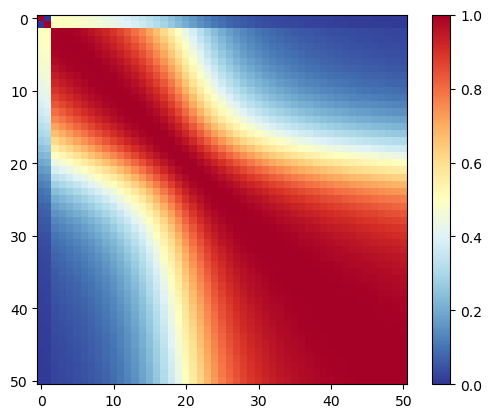

In [34]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt

l = 10
lst_gs=[]
# Using neel state as an inital state inside DMRG
psi_init_neel = qtn.tensor_builder.MPS_neel_state(l)
for _ in range(0,51):
    h1=_/50
    Ham1=qtn.tensor_builder.MPO_ham_heis(L=l, j=(1.0,0.0,0.0), bz=h1, S=1/2) # for make the MPO in tensor network form we use this formation in quimb
    DMRG_1 = qtn.tensor_dmrg.DMRG(Ham1,20,p0=psi_init_neel) # make DMRG 
    DMRG_1.solve(tol=1e-6, verbosity=1)
    gs = DMRG_1.state # DMRG state
    lst_gs.append(gs)

lst_kernel = []
for i in range(len(lst_gs)):
    for j in range(len(lst_gs)):
        val = np.absolute(lst_gs[i].H @ lst_gs[j])**2
        lst_kernel.append(val) 

re_shape_kernel = np.array(lst_kernel).reshape(51,51)

plt.imshow(re_shape_kernel, cmap='RdYlBu_r') # now we plot the kernel between different neighbors base the  intensity and their value
plt.colorbar()
plt.show()

`PreComputed Kernel and model`

In [1]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics



# Make Kernel
def heis_kernel(h1,h2):

    H1 = qtn.tensor_builder.MPO_ham_heis(L=10, j=(1.0,0.0,0.0),bz=h1,S=1/2)# for make the MPO in tensor network form we use this formation in quimb
    DMRG_1 = qtn.tensor_dmrg.DMRG(H1,20) # make DMRG 
    DMRG_1.solve(tol=1e-6,verbosity=1)
    gs1 = DMRG_1.state # DMRG state
    H2 = qtn.tensor_builder.MPO_ham_heis(L=10, j=(1.0,0.0,0.0),bz=h2,S=1/2)
    DMRG_2 = qtn.tensor_dmrg.DMRG(H2,20) # make DMRG 
    DMRG_2.solve(tol=1e-6, verbosity=1)
    gs2 = DMRG_2.state #DMRG state
    return np.abs(gs1.H @ gs2)**2

def heis_kernel_matrix(X1,X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            print(x1[0],x2[0])
            gram_matrix[i, j] = heis_kernel(x1[0], x2[0])
    return gram_matrix

# Create an SVC classifier with the custom kernel
from sklearn.svm import SVC
clf = SVC(kernel=heis_kernel_matrix)

`dataset`

In [2]:
# Make dataset
X = np.linspace(0,1,10)
Y = np.sign(X - 0.5)

X = X.reshape(-1,1)

# Spliting the dataset
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size=0.4)

In [3]:
# Fit the classifier to your data
clf.fit(X_train, y_train)

0.1111111111111111 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


  0%|                                                     | 0/9 [00:00<?, ?it/s]

100%|#############################################| 9/9 [00:00<00:00, 11.26it/s]

Energy: -2.2871723242799145 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 243.41it/s]

Energy: -2.2871723241499726 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.41it/s]

Energy: -2.287172322870691 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 185.96it/s]

Energy: -2.287172324092012 ... converged!
0.1111111111111111 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 33.56it/s]

Energy: -2.287172305138972 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.90it/s]

Energy: -2.2871723241439845 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 20.61it/s]

Energy: -2.9026842563354998 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.39it/s]

Energy: -2.902685882635393 ... not converged.
SWEEP-3, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.64it/s]

Energy: -2.9026858826457285 ... converged!
0.1111111111111111 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.07it/s]

Energy: -2.2871723218161146 ... not converged.


SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 111.13it/s]

Energy: -2.287172324091115 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 32.13it/s]

Energy: -3.307301750817381 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.28it/s]

Energy: -3.30730184877938 ... converged!


0.1111111111111111 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.39it/s]

Energy: -2.2871723235129053 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.59it/s]

Energy: -2.2871723241499926 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.80it/s]

Energy: -2.2499999999994786 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 346.81it/s]

Energy: -2.2499999999999973 ... converged!


0.1111111111111111 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 34.17it/s]

Energy: -2.287161907407195 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.28it/s]

Energy: -2.2871723241501334 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.71it/s]

Energy: -2.287172324150093 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.86it/s]

Energy: -4.766013136681093 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.63it/s]

Energy: -4.766013356460174 ... converged!
0.1111111111111111 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.34it/s]

Energy: -2.2871723236662795 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 168.93it/s]

Energy: -2.2871723241517357 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.67it/s]

Energy: -4.258350108161072 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 152.27it/s]

Energy: -4.258350121551534 ... converged!
0.4444444444444444 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.51it/s]

Energy: -2.9026820276044303 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 119.66it/s]

Energy: -2.902685882628737 ... not converged.
SWEEP-3, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 157.12it/s]

Energy: -2.9026858826456037 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 42.66it/s]

Energy: -2.287172323920035 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.65it/s]

Energy: -2.287172324128965 ... converged!
0.4444444444444444 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.57it/s]

Energy: -2.9026857495974876 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 178.44it/s]

Energy: -2.902685882622555 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 19.67it/s]

Energy: -2.902685848111595 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.81it/s]

Energy: -2.902685882644024 ... converged!
0.4444444444444444 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.44it/s]

Energy: -2.902684906046011 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 117.63it/s]

Energy: -2.9026858826350677 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 26.66it/s]

Energy: -3.307301792438555 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 103.27it/s]

Energy: -3.307301848768353 ... converged!
0.4444444444444444 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.09it/s]

Energy: -2.902685863410417 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.09it/s]

Energy: -2.9026858826442705 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 35.89it/s]

Energy: -2.249999999998686 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 189.75it/s]

Energy: -2.249999999999999 ... converged!


0.4444444444444444 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 24.64it/s]

Energy: -2.9026854623352167 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.13it/s]

Energy: -2.9026858826441484 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 35.38it/s]

Energy: -4.766013247179052 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 35.75it/s]

Energy: -4.7660133564596405 ... converged!
0.4444444444444444 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 18.70it/s]

Energy: -2.9026848390375264 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 107.43it/s]

Energy: -2.9026858826415998 ... not converged.
SWEEP-3, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.61it/s]

Energy: -2.9026858826458746 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.06it/s]

Energy: -4.258349897191009 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 57.93it/s]

Energy: -4.258350121552879 ... converged!
0.5555555555555556 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.71it/s]

Energy: -3.3073016880495794 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.72it/s]

Energy: -3.3073018487761114 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.60it/s]

Energy: -2.2871723231685896 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 132.98it/s]

Energy: -2.287172324128853 ... converged!


0.5555555555555556 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 26.01it/s]

Energy: -3.30730013056791 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.75it/s]

Energy: -3.3073018487780246 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.18it/s]

Energy: -3.30730184878081 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 26.05it/s]

Energy: -2.9026850006784533 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.64it/s]

Energy: -2.9026858826401973 ... converged!


0.5555555555555556 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 30.74it/s]

Energy: -3.307300205839705 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.88it/s]

Energy: -3.3073018487797836 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 62.20it/s]

Energy: -3.3073018487808072 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 46.96it/s]

Energy: -3.3073017902481303 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.83it/s]

Energy: -3.3073018487791637 ... converged!
0.5555555555555556 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 36.44it/s]

Energy: -3.307295489167938 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.82it/s]

Energy: -3.307301848778149 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 97.29it/s]

Energy: -3.3073018487808126 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 69.96it/s]

Energy: -2.2499999999998614 ... not converged.
SWEEP-2, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 181.69it/s]

Energy: -2.2500000000000018 ... converged!


0.5555555555555556 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 19.98it/s]

Energy: -3.307301712752525 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 63.07it/s]

Energy: -3.3073018487780392 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.64it/s]

Energy: -4.766012689012371 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 32.74it/s]

Energy: -4.766013356459942 ... converged!
0.5555555555555556 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 33.31it/s]

Energy: -3.307301785454372 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.14it/s]

Energy: -3.307301848779544 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.47it/s]

Energy: -4.258349422523743 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.49it/s]

Energy: -4.2583501215540815 ... converged!
0.0 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.63it/s]

Energy: -2.249999999999987 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 226.26it/s]

Energy: -2.2499999999999996 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 31.40it/s]

Energy: -2.287172324332727 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.42it/s]

Energy: -2.2871723241282544 ... converged!
0.0 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.52it/s]

Energy: -2.2499999999999334 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.82it/s]

Energy: -2.250000000000003 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 18.12it/s]

Energy: -2.9026855476611666 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.11it/s]

Energy: -2.9026858826444104 ... converged!


0.0 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 136.57it/s]

Energy: -2.2499999999988525 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.17it/s]

Energy: -2.2499999999999964 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.51it/s]

Energy: -3.3073015411348936 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.07it/s]

Energy: -3.3073018487792303 ... converged!
0.0 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 161.14it/s]

Energy: -2.24999999999997 ... not converged.
SWEEP-2, direction=R, max_bond=(2/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 169.36it/s]

Energy: -2.2500000000000027 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 128.25it/s]

Energy: -2.2499999999900098 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 200.25it/s]

Energy: -2.25 ... converged!
0.0 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 45.78it/s]

Energy: -2.2499999999752056 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 283.24it/s]

Energy: -2.25 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.18it/s]

Energy: -4.766013223844422 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.75it/s]

Energy: -4.766013356459984 ... converged!
0.0 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.51it/s]

Energy: -2.2499999999979416 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 141.17it/s]

Energy: -2.25 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 25.44it/s]

Energy: -4.258349404858895 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.09it/s]

Energy: -4.258350121551934 ... converged!
0.8888888888888888 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.39it/s]

Energy: -4.766013342483277 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.13it/s]

Energy: -4.76601335646011 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.74it/s]

Energy: -2.287172323047774 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.67it/s]

Energy: -2.287172324149879 ... converged!
0.8888888888888888 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.10it/s]

Energy: -4.766013252698895 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.46it/s]

Energy: -4.766013356460046 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.47it/s]

Energy: -2.902685377211674 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.59it/s]

Energy: -2.9026858826365167 ... converged!
0.8888888888888888 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.62it/s]

Energy: -4.766013281774487 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.84it/s]

Energy: -4.766013356459776 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 21.18it/s]

Energy: -3.3073013462518155 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 146.37it/s]

Energy: -3.3073018487716785 ... converged!
0.8888888888888888 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 53.68it/s]

Energy: -4.766012711153954 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.97it/s]

Energy: -4.766013356459743 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.63it/s]

Energy: -2.249999999999721 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 155.94it/s]

Energy: -2.2500000000000004 ... converged!
0.8888888888888888 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 25.14it/s]

Energy: -4.766013247983726 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.14it/s]

Energy: -4.766013356458981 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.15it/s]

Energy: -4.766013151009724 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.18it/s]

Energy: -4.766013356459926 ... converged!


0.8888888888888888 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 45.03it/s]

Energy: -4.76601329312896 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.77it/s]

Energy: -4.7660133564599185 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 35.45it/s]

Energy: -4.2583498580283985 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.15it/s]

Energy: -4.258350121552724 ... converged!


0.7777777777777777 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 17.40it/s]

Energy: -4.258350023517279 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.29it/s]

Energy: -4.258350121551931 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.46it/s]

Energy: -2.287160750952367 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 76.73it/s]

Energy: -2.287172324139412 ... not converged.
SWEEP-3, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 112.26it/s]

Energy: -2.287172324150091 ... converged!
0.7777777777777777 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 31.79it/s]

Energy: -4.2583498547429395 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.41it/s]

Energy: -4.258350121553165 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 28.72it/s]

Energy: -2.9026858581876103 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.05it/s]

Energy: -2.9026858826364252 ... converged!


0.7777777777777777 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 33.46it/s]

Energy: -4.258349174685938 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 36.71it/s]

Energy: -4.258350121555021 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 20.19it/s]

Energy: -3.307301823288449 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.34it/s]

Energy: -3.307301848780177 ... converged!
0.7777777777777777 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 27.79it/s]

Energy: -4.258350010670902 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.11it/s]

Energy: -4.258350121552441 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.89it/s]


Energy: -2.2499999999999885 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 178.19it/s]

Energy: -2.250000000000005 ... converged!
0.7777777777777777 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 51.41it/s]

Energy: -4.258349767907745 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 58.58it/s]

Energy: -4.258350121551981 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 33.38it/s]

Energy: -4.76601283411013 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 131.16it/s]

Energy: -4.766013356460338 ... converged!
0.7777777777777777 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.87it/s]

Energy: -4.258349974674385 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 125.88it/s]

Energy: -4.258350121553434 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 35.37it/s]

Energy: -4.258350018219112 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.14it/s]

Energy: -4.258350121552889 ... converged!


SVC(kernel=<function heis_kernel_matrix at 0x7f2dd597d870>)

In [4]:
# evaluating the accuracy of this model by test data
y_pred = clf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.3333333333333333 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 51.20it/s]

Energy: -2.598193557206799 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 89.84it/s]

Energy: -2.5982038844107636 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 78.39it/s]

Energy: -2.5982038844617157 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.20it/s]

Energy: -2.2871723241007094 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 145.64it/s]

Energy: -2.287172324149988 ... converged!
0.3333333333333333 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 20.22it/s]

Energy: -2.5982032504318497 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 169.34it/s]

Energy: -2.598203884460307 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 32.12it/s]

Energy: -2.9026857471306466 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.97it/s]

Energy: -2.9026858826410176 ... converged!
0.3333333333333333 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.74it/s]

Energy: -2.598201793408533 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 126.91it/s]

Energy: -2.5982038844561215 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.84it/s]

Energy: -2.598203884461748 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.72it/s]

Energy: -3.3073017197735965 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.50it/s]

Energy: -3.307301848779463 ... converged!
0.3333333333333333 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 35.47it/s]

Energy: -2.598201273046201 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 167.88it/s]

Energy: -2.598203884448865 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.92it/s]

Energy: -2.5982038844616167 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 44.33it/s]

Energy: -2.2499999999972786 ... not converged.
SWEEP-2, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 239.50it/s]

Energy: -2.250000000000001 ... converged!
0.3333333333333333 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 25.12it/s]

Energy: -2.598200168952642 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 100.30it/s]

Energy: -2.598203884339881 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.52it/s]

Energy: -2.5982038844604043 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.35it/s]

Energy: -4.766013167509326 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.30it/s]

Energy: -4.766013356460022 ... converged!


0.3333333333333333 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 18.85it/s]

Energy: -2.598200584080221 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.05it/s]

Energy: -2.5982038844124 ... not converged.


SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 78.02it/s]

Energy: -2.5982038844611974 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.23it/s]

Energy: -4.258350050752536 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 94.35it/s]

Energy: -4.258350121553116 ... converged!


0.6666666666666666 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 35.64it/s]

Energy: -3.768055442010618 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 134.81it/s]

Energy: -3.7680556946485932 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 41.40it/s]

Energy: -2.2871723244177184 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 222.64it/s]

Energy: -2.287172324149975 ... converged!
0.6666666666666666 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.22it/s]

Energy: -3.7680528717801796 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 189.60it/s]

Energy: -3.7680556946415034 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 133.23it/s]

Energy: -3.7680556946491524 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 35.60it/s]

Energy: -2.902685788775751 ... not converged.
SWEEP-2, direction=R, max_bond=(13/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 153.17it/s]

Energy: -2.902685882637323 ... converged!
0.6666666666666666 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 52.56it/s]

Energy: -3.768055668820071 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 192.97it/s]

Energy: -3.768055694649038 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.74it/s]

Energy: -3.307301821642345 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 261.88it/s]

Energy: -3.3073018487802384 ... converged!
0.6666666666666666 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.10it/s]

Energy: -3.768055446321082 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 260.95it/s]

Energy: -3.7680556946488784 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 244.24it/s]

Energy: -2.249999999998521 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 392.17it/s]

Energy: -2.249999999999998 ... converged!
0.6666666666666666 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 96.05it/s]

Energy: -3.768055655853294 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 138.27it/s]

Energy: -3.7680556946489983 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 29.28it/s]

Energy: -4.7660130829788665 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 59.05it/s]

Energy: -4.76601335646027 ... converged!


0.6666666666666666 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 33.63it/s]

Energy: -3.768055422912787 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 56.57it/s]

Energy: -3.7680556946490107 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 21.84it/s]

Energy: -4.2583497951042935 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 77.69it/s]

Energy: -4.258350121553911 ... converged!
0.2222222222222222 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 37.16it/s]

Energy: -2.4004142360150595 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.38it/s]

Energy: -2.400415648542134 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.10it/s]

Energy: -2.40046168553055 ... not converged.


SWEEP-4, direction=R, max_bond=(7/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 69.10it/s]

Energy: -2.4004743710679977 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 46.75it/s]

Energy: -2.4004744243898184 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 33.01it/s]

Energy: -2.2871723218528897 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 121.67it/s]

Energy: -2.287172324136254 ... converged!
0.2222222222222222 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 30.96it/s]

Energy: -2.400419093844488 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 61.33it/s]

Energy: -2.400455213274514 ... not converged.
SWEEP-3, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 186.36it/s]

Energy: -2.400474423779423 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 239.33it/s]

Energy: -2.4004744244634884 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.88it/s]

Energy: -2.9026853252106792 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 67.68it/s]

Energy: -2.90268588264353 ... converged!
0.2222222222222222 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.85it/s]

Energy: -2.4004150276631835 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 86.87it/s]

Energy: -2.4004462475734174 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.51it/s]

Energy: -2.400474409962726 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 88.33it/s]

Energy: -2.400474424440073 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 27.00it/s]

Energy: -3.307301757140855 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.34it/s]

Energy: -3.3073018487800874 ... converged!
0.2222222222222222 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 20.66it/s]

Energy: -2.4004332379158355 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 41.29it/s]

Energy: -2.4004720976400455 ... not converged.
SWEEP-3, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 98.38it/s]

Energy: -2.4004744202687798 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.74it/s]

Energy: -2.400474424455475 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.64it/s]

Energy: -2.2499999996615703 ... not converged.
SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 220.12it/s]

Energy: -2.2499999999999996 ... converged!


0.2222222222222222 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.16it/s]

Energy: -2.4004168298550264 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.36it/s]

Energy: -2.400470442430919 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.17it/s]

Energy: -2.400474420882013 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 65.70it/s]

Energy: -2.4004744244593383 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.45it/s]

Energy: -4.766013215460211 ... not converged.


SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 177.32it/s]

Energy: -4.766013356459269 ... converged!
0.2222222222222222 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 68.77it/s]

Energy: -2.400414335431179 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 39.29it/s]

Energy: -2.4004197524513993 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 64.89it/s]

Energy: -2.400454869310664 ... not converged.
SWEEP-4, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.59it/s]

Energy: -2.400474398568568 ... not converged.
SWEEP-5, direction=R, max_bond=(6/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.45it/s]

Energy: -2.400474424431959 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.05it/s]

Energy: -4.258349832390338 ... not converged.
SWEEP-2, direction=R, max_bond=(9/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 71.04it/s]

Energy: -4.258350121552981 ... converged!
1.0 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 50.85it/s]

Energy: -5.284829719167418 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.23it/s]

Energy: -5.284829775786891 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.04it/s]

Energy: -2.2871723237676056 ... not converged.
SWEEP-2, direction=R, max_bond=(5/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 91.70it/s]

Energy: -2.28717232409193 ... converged!
1.0 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.67it/s]

Energy: -5.284829648959874 ... not converged.
SWEEP-2, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.13it/s]

Energy: -5.284829775787459 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 33.50it/s]

Energy: -2.902685783874226 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.22it/s]

Energy: -2.9026858826432815 ... converged!
1.0 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 34.57it/s]

Energy: -5.284829618846492 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 77.14it/s]

Energy: -5.284829775787543 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 18.18it/s]

Energy: -3.307301316752744 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 73.38it/s]

Energy: -3.3073018487797454 ... converged!
1.0 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 49.36it/s]

Energy: -5.284829412406026 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 81.61it/s]

Energy: -5.284829775789164 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 47.22it/s]

Energy: -2.2499999440644145 ... not converged.


SWEEP-2, direction=R, max_bond=(3/20), cutoff:1e-09


100%|############################################| 9/9 [00:00<00:00, 186.65it/s]

Energy: -2.2499999999999982 ... converged!
1.0 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 38.31it/s]

Energy: -5.284829419830029 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 95.60it/s]

Energy: -5.284829775786628 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 42.25it/s]

Energy: -4.766013253762986 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 72.56it/s]

Energy: -4.766013356460044 ... converged!
1.0 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 43.95it/s]

Energy: -5.284829765571508 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.50it/s]

Energy: -5.284829775786612 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 40.71it/s]

Energy: -4.2583500422155565 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 99.19it/s]

Energy: -4.258350121552101 ... converged!
Accuracy: 1.0


`prediction`

In [5]:
clf.predict(np.array([[0.51]]))

0.51 0.1111111111111111
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 64.78it/s]

Energy: -3.132286253641927 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 207.75it/s]

Energy: -3.132288531923892 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 83.45it/s]

Energy: -3.1322885319340363 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 57.64it/s]

Energy: -2.2871723233695316 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 114.23it/s]

Energy: -2.287172324144509 ... converged!
0.51 0.4444444444444444
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 75.17it/s]

Energy: -3.1322854234374464 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 106.54it/s]

Energy: -3.1322885318951643 ... not converged.
SWEEP-3, direction=R, max_bond=(6/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 70.23it/s]

Energy: -3.13228853193338 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 15.26it/s]

Energy: -2.9026858327765575 ... not converged.
SWEEP-2, direction=R, max_bond=(12/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 111.27it/s]

Energy: -2.9026858826444872 ... converged!
0.51 0.5555555555555556
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 48.68it/s]

Energy: -3.1322882205142704 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 93.95it/s]

Energy: -3.132288531920792 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 22.01it/s]

Energy: -3.3073017622588385 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 80.85it/s]

Energy: -3.3073018487786743 ... converged!
0.51 0.0
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 27.66it/s]

Energy: -3.1322881915445175 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 44.87it/s]

Energy: -3.1322885319328875 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 60.16it/s]

Energy: -2.249999999983922 ... not converged.
SWEEP-2, direction=R, max_bond=(4/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 200.82it/s]

Energy: -2.2499999999999982 ... converged!
0.51 0.8888888888888888
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 24.67it/s]

Energy: -3.132288479158056 ... not converged.
SWEEP-2, direction=R, max_bond=(11/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 62.95it/s]

Energy: -3.1322885319274474 ... converged!
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 23.14it/s]

Energy: -4.766013216811965 ... not converged.
SWEEP-2, direction=R, max_bond=(7/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 66.01it/s]

Energy: -4.766013356459961 ... converged!


0.51 0.7777777777777777
SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 30.08it/s]

Energy: -3.132288322423846 ... not converged.
SWEEP-2, direction=R, max_bond=(10/20), cutoff:1e-09



100%|############################################| 9/9 [00:00<00:00, 176.19it/s]

Energy: -3.132288531932455 ... converged!


SWEEP-1, direction=R, max_bond=(20/20), cutoff:1e-09


100%|#############################################| 9/9 [00:00<00:00, 40.31it/s]

Energy: -4.258349978204616 ... not converged.
SWEEP-2, direction=R, max_bond=(8/20), cutoff:1e-09



100%|#############################################| 9/9 [00:00<00:00, 54.21it/s]

Energy: -4.258350121552571 ... converged!


array([1.])

### 7th example


## `MPS Case with TEBD`

`kernel`

In [6]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt

# Computational state as an initial state
def MPS_computational_state(l):
    L = l
    binary = '0'+'1'
    for i in range(L//2-1):
        si = '0'+'1'
        binary += si
    return qtn.tensor_builder.MPS_computational_state(binary)

# Hamiltonian 
def Hamiltonian_1D(S,l,J,h):
    builder = qtn.SpinHam1D(S)
    builder += J, 'X', 'X'
    for i in range(l):
        builder[i] += h , 'Z'
    return builder.build_local_ham(l)

S=1/2
l=10
J=1

lst_tebd_state_1 = []
lst_tebd_state_2 = []
lst_kernel =[]

for _ in range(0,41):
    h1 = _/40
    ts = np.linspace(0, 15, 20) # this is the time that we are intrested in and if we didnt have such ts, 
    # the formation of the kernel intensity in graph was completely black
    tebd_1 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h1)) # this is the formation of TEBD
    lst_psif_1 = []
    for psif in tebd_1.at_times(ts, tol=1e-3): # generate the state at each time in ts and target error 1e-3 for whole evolution
        lst_psif_1.append(psif)
    state_1 = lst_psif_1[-1] # state of the system at the current time 
    lst_tebd_state_1.append(state_1)
    lst_psif_1.clear() 
    for _ in range(0,41):
        h2 = _/40
        ts = np.linspace(0, 15, 20)
        tebd_2 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h2))
        lst_psif_2 = []
        for psif in tebd_2.at_times(ts, tol=1e-3):
            lst_psif_2.append(psif)
        state_2 = lst_psif_2[-1]
        lst_tebd_state_2.append(state_2)
        lst_psif_2.clear()
        value = (state_1.H @ state_2)
        lst_kernel.append(value)

kernel= np.array(lst_kernel)


  0%|          | 0/20 [00:00<?, ?it/s]

t=15, max-bond=32: 100%|##########| 20/20 [00:04<00:00,  4.13it/s]   


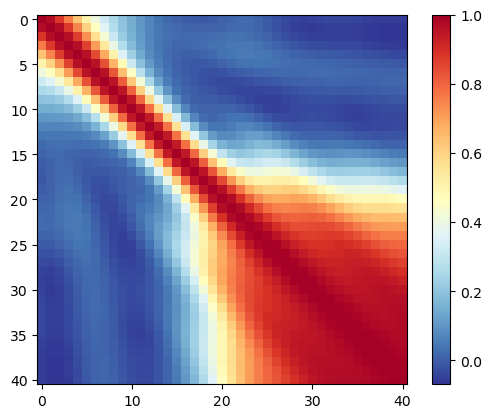

In [7]:
re_kernel = kernel.reshape(41,41) # we reshape the arrayes to a square matrix
plt.imshow(re_kernel.real, cmap='RdYlBu_r') # now we plot the kernel between different neighbors base the  intensity and their value
plt.colorbar()
plt.show()

`PreComputed kernel, Building the Model, Evaluatig the accuracy`

In [1]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Make dataset
X = np.linspace(0,1,40)
Y = np.sign(X - 0.5)

X = X.reshape(-1,1)

# Spliting the dataset
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size=0.4)

# Make Kernel

# Initial Eigen state
def MPS_computational_state(l):
    L = l
    binary = '0'+'1'
    for i in range(L//2-1):
        si = '0'+'1'
        binary += si
    return qtn.tensor_builder.MPS_computational_state(binary)

# Hamiltonian 
def Hamiltonian_1D(S,l,J,h):
    builder = qtn.SpinHam1D(S)
    builder += J, 'X', 'X'
    for i in range(l):
        builder[i] += h , 'Z'
    return builder.build_local_ham(l)

S=1/2
l=10
J=1

def heis_kernel(h1,h2):

    ts = np.linspace(0, 10, 10)
    
    tebd_1 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h1)) # this is the formation of TEBD
    lst_psif_1 = []
    for psif in tebd_1.at_times(ts, tol=1e-3): # generate the state at each time in ts and target error 1e-3 for whole evolution
        lst_psif_1.append(psif)
    gs1 = lst_psif_1[-1] # state of the system at the current time 


    tebd_2 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h2))
    lst_psif_2 = []
    for psif in tebd_2.at_times(ts, tol=1e-3):
        lst_psif_2.append(psif)
    gs2 = lst_psif_2[-1]
    
    return np.abs(gs1.H @ gs2)**2

def heis_kernel_matrix(X1,X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            print(x1[0],x2[0])
            gram_matrix[i, j] = heis_kernel(x1[0], x2[0])
    return gram_matrix

# Create an SVC classifier with the custom kernel
from sklearn.svm import SVC
clf = SVC(kernel=heis_kernel_matrix)

# Fit the classifier to your data
clf.fit(X_train, y_train)

# evaluating the accuracy of this model by test data
y_pred = clf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.8974358974358974 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.8974358974358974 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.8974358974358974 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.8974358974358974 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.8974358974358974 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.8974358974358974 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.8974358974358974 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.8974358974358974 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.8974358974358974 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.8974358974358974 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.33it/s] 


0.8974358974358974 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.8974358974358974 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.8974358974358974 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.8974358974358974 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.8974358974358974 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  


0.8974358974358974 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.8974358974358974 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.8974358974358974 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.8974358974358974 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.8974358974358974 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.8974358974358974 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.8974358974358974 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.8974358974358974 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.8974358974358974 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.2564102564102564 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.2564102564102564 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.2564102564102564 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.45it/s]  


0.2564102564102564 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.2564102564102564 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.2564102564102564 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.2564102564102564 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.2564102564102564 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.2564102564102564 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.2564102564102564 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.28it/s] 


0.2564102564102564 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.2564102564102564 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.2564102564102564 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.2564102564102564 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.2564102564102564 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.2564102564102564 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.2564102564102564 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.2564102564102564 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.2564102564102564 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.50it/s]  


0.2564102564102564 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.48it/s]  


0.2564102564102564 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.2564102564102564 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.2564102564102564 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.2564102564102564 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:04<00:00,  2.28it/s]  


0.10256410256410256 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.36it/s]  


0.10256410256410256 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.10256410256410256 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.10256410256410256 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.10256410256410256 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.10256410256410256 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.10256410256410256 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.10256410256410256 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:03<00:00,  2.82it/s]  


0.10256410256410256 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.85it/s]  


0.10256410256410256 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.78it/s] 


0.10256410256410256 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.10256410256410256 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.10256410256410256 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.10256410256410256 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.95it/s]  


0.10256410256410256 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.71it/s]  


0.10256410256410256 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.10256410256410256 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.10256410256410256 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.10256410256410256 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.10256410256410256 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.10256410256410256 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:04<00:00,  2.27it/s]  


0.10256410256410256 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.10256410256410256 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.10256410256410256 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.8461538461538461 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.8461538461538461 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.8461538461538461 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.8461538461538461 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.8461538461538461 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.8461538461538461 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.8461538461538461 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.8461538461538461 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.8461538461538461 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.8461538461538461 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.27it/s] 


0.8461538461538461 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.8461538461538461 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.8461538461538461 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.8461538461538461 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.8461538461538461 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.47it/s]  


0.8461538461538461 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.8461538461538461 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.8461538461538461 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.8461538461538461 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.8461538461538461 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.8461538461538461 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.8461538461538461 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.8461538461538461 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.8461538461538461 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.6923076923076923 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.6923076923076923 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.6923076923076923 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.6923076923076923 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.6923076923076923 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.6923076923076923 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.6923076923076923 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.6923076923076923 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:03<00:00,  2.69it/s]  


0.6923076923076923 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.87it/s]  


0.6923076923076923 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.21it/s] 


0.6923076923076923 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.6923076923076923 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.6923076923076923 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.6923076923076923 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.6923076923076923 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.6923076923076923 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.6923076923076923 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.6923076923076923 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.6923076923076923 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.6923076923076923 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.6923076923076923 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.6923076923076923 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.6923076923076923 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.6923076923076923 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.23076923076923075 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.23076923076923075 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.23076923076923075 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.23076923076923075 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.42it/s]  


0.23076923076923075 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.23076923076923075 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.23076923076923075 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.23076923076923075 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.23076923076923075 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.23076923076923075 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.97it/s] 


0.23076923076923075 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.23076923076923075 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.23076923076923075 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.23076923076923075 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.23076923076923075 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.23076923076923075 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.23076923076923075 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.23076923076923075 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.23076923076923075 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.23076923076923075 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.42it/s]  


0.23076923076923075 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.23076923076923075 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.23076923076923075 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.23076923076923075 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.923076923076923 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.923076923076923 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.923076923076923 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.923076923076923 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.923076923076923 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.79it/s]  


0.923076923076923 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.923076923076923 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.923076923076923 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.923076923076923 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.923076923076923 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.90it/s] 


0.923076923076923 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.923076923076923 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.923076923076923 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.923076923076923 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:05<00:00,  1.92it/s]  


0.923076923076923 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.93it/s]  


0.923076923076923 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  2.73it/s]  


0.923076923076923 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.923076923076923 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.923076923076923 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.923076923076923 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.923076923076923 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.923076923076923 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.923076923076923 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:03<00:00,  2.69it/s]  


0.923076923076923 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.41025641025641024 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.41025641025641024 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.41025641025641024 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.41025641025641024 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.41025641025641024 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.41025641025641024 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.41025641025641024 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.41025641025641024 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.41025641025641024 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.41025641025641024 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.45it/s] 


0.41025641025641024 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.59it/s]  


0.41025641025641024 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.41025641025641024 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.33it/s]  


0.41025641025641024 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.41025641025641024 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.41025641025641024 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.41025641025641024 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.41025641025641024 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.62it/s]  


0.41025641025641024 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.41025641025641024 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.41025641025641024 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.41025641025641024 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.41025641025641024 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.41025641025641024 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.7948717948717948 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.7948717948717948 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.7948717948717948 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.7948717948717948 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.7948717948717948 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.7948717948717948 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.7948717948717948 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.7948717948717948 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.7948717948717948 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.7948717948717948 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.44it/s] 


0.7948717948717948 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.7948717948717948 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.7948717948717948 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.7948717948717948 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.7948717948717948 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.58it/s]  


0.7948717948717948 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.7948717948717948 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.7948717948717948 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.64it/s]  


0.7948717948717948 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7948717948717948 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7948717948717948 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.54it/s]  


0.7948717948717948 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.7948717948717948 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.7948717948717948 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.1794871794871795 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.1794871794871795 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.1794871794871795 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.45it/s]  


0.1794871794871795 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.1794871794871795 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.1794871794871795 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.1794871794871795 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.1794871794871795 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.1794871794871795 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.1794871794871795 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.44it/s] 


0.1794871794871795 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.1794871794871795 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.52it/s]  


0.1794871794871795 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.1794871794871795 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.1794871794871795 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.1794871794871795 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.1794871794871795 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.1794871794871795 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.59it/s]  


0.1794871794871795 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.1794871794871795 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.1794871794871795 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  


0.1794871794871795 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.1794871794871795 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.1794871794871795 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.28205128205128205 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.28205128205128205 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.28205128205128205 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.28205128205128205 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.28205128205128205 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.28205128205128205 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.28205128205128205 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.28205128205128205 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.28205128205128205 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.28205128205128205 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.58it/s] 


0.28205128205128205 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.28205128205128205 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.60it/s]  


0.28205128205128205 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.28205128205128205 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.00it/s]  


0.28205128205128205 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.63it/s]  


0.28205128205128205 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.28205128205128205 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.28205128205128205 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.74it/s]  


0.28205128205128205 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.28205128205128205 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.97it/s]  


0.28205128205128205 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.68it/s]  


0.28205128205128205 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.28205128205128205 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.28205128205128205 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.05128205128205128 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.05128205128205128 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.52it/s]  


0.05128205128205128 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.66it/s]  


0.05128205128205128 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.05128205128205128 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.05128205128205128 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.53it/s]  


0.05128205128205128 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.05128205128205128 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.05128205128205128 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.03it/s]  


0.05128205128205128 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.93it/s] 


0.05128205128205128 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.67it/s]  


0.05128205128205128 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.05128205128205128 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.36it/s]  


0.05128205128205128 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.36it/s]  


0.05128205128205128 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.05128205128205128 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.05128205128205128 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.05128205128205128 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.05128205128205128 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.38it/s]  


0.05128205128205128 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.48it/s]  


0.05128205128205128 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.05128205128205128 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.05128205128205128 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.05128205128205128 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.7435897435897436 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.7435897435897436 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.7435897435897436 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.09it/s]  


0.7435897435897436 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.7435897435897436 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.64it/s]  


0.7435897435897436 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.7435897435897436 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.7435897435897436 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.7435897435897436 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.7435897435897436 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.16it/s] 


0.7435897435897436 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.7435897435897436 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.7435897435897436 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.7435897435897436 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.7435897435897436 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.7435897435897436 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.7435897435897436 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.7435897435897436 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.7435897435897436 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.7435897435897436 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.7435897435897436 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.7435897435897436 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.7435897435897436 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.7435897435897436 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.5384615384615384 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.5384615384615384 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.5384615384615384 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.5384615384615384 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.00it/s]  


0.5384615384615384 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.5384615384615384 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.5384615384615384 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.81it/s]  


0.5384615384615384 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.5384615384615384 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.5384615384615384 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.88it/s] 


0.5384615384615384 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.5384615384615384 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.5384615384615384 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.5384615384615384 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.5384615384615384 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.5384615384615384 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.5384615384615384 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.5384615384615384 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.5384615384615384 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.5384615384615384 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.5384615384615384 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.5384615384615384 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.5384615384615384 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.5384615384615384 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.02564102564102564 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.02564102564102564 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.02564102564102564 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.02564102564102564 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.02564102564102564 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.45it/s]  


0.02564102564102564 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.02564102564102564 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.02564102564102564 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.02564102564102564 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.02564102564102564 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.91it/s] 


0.02564102564102564 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.02564102564102564 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.02564102564102564 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.02564102564102564 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.02564102564102564 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.97it/s]  


0.02564102564102564 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.02564102564102564 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.02564102564102564 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.02564102564102564 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.02564102564102564 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.02564102564102564 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.02564102564102564 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.02564102564102564 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.02564102564102564 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.4358974358974359 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.4358974358974359 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.4358974358974359 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.4358974358974359 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.4358974358974359 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.36it/s]  


0.4358974358974359 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.4358974358974359 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.31it/s]  


0.4358974358974359 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.4358974358974359 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.31it/s]  


0.4358974358974359 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.85it/s] 


0.4358974358974359 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.4358974358974359 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.4358974358974359 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.4358974358974359 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.4358974358974359 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.00it/s]  


0.4358974358974359 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.4358974358974359 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.4358974358974359 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.4358974358974359 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.31it/s]  


0.4358974358974359 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.4358974358974359 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.4358974358974359 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.4358974358974359 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.4358974358974359 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:03<00:00,  2.78it/s]  


0.3333333333333333 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.26it/s]  


0.3333333333333333 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.3333333333333333 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.81it/s]  


0.3333333333333333 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.62it/s]  


0.3333333333333333 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.3333333333333333 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.3333333333333333 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.3333333333333333 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.3333333333333333 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.3333333333333333 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:04<00:00,  2.48it/s] 


0.3333333333333333 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.3333333333333333 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.3333333333333333 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.3333333333333333 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.3333333333333333 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.3333333333333333 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.3333333333333333 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.3333333333333333 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.3333333333333333 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.3333333333333333 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.3333333333333333 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.3333333333333333 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.3333333333333333 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.3333333333333333 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.0 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.0 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.45it/s]  


0.0 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.0 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.0 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.0 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.0 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.07it/s]  


0.0 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.0 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.0 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.77it/s] 


0.0 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.0 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.0 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.0 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.0 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.0 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.0 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.0 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.0 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.0 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.0 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.0 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.0 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.0 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.9487179487179487 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.9487179487179487 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.9487179487179487 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.9487179487179487 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.9487179487179487 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.03it/s]  


0.9487179487179487 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.9487179487179487 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.9487179487179487 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.9487179487179487 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.9487179487179487 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.54it/s] 


0.9487179487179487 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.9487179487179487 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.9487179487179487 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.9487179487179487 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.9487179487179487 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.9487179487179487 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.9487179487179487 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.9487179487179487 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.9487179487179487 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.06it/s]  


0.9487179487179487 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.9487179487179487 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.9487179487179487 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.9487179487179487 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.9487179487179487 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.5641025641025641 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.5641025641025641 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.5641025641025641 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.5641025641025641 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.10it/s]  


0.5641025641025641 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.5641025641025641 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.5641025641025641 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.5641025641025641 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.5641025641025641 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.5641025641025641 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.65it/s] 


0.5641025641025641 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.5641025641025641 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.5641025641025641 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.5641025641025641 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.10it/s]  


0.5641025641025641 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.5641025641025641 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.5641025641025641 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.5641025641025641 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.5641025641025641 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.03it/s]  


0.5641025641025641 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.5641025641025641 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.55it/s]  


0.5641025641025641 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.5641025641025641 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.5641025641025641 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.07692307692307693 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.07it/s]  


0.07692307692307693 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.07692307692307693 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.07692307692307693 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.07692307692307693 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.07692307692307693 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.07692307692307693 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.07692307692307693 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.07692307692307693 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.07692307692307693 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.73it/s] 


0.07692307692307693 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.07692307692307693 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.07692307692307693 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.07692307692307693 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.07692307692307693 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.07692307692307693 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.07692307692307693 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.07692307692307693 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.07692307692307693 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.07692307692307693 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.07692307692307693 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.07692307692307693 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.07692307692307693 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.07692307692307693 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.717948717948718 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.717948717948718 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.717948717948718 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.717948717948718 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.10it/s]  


0.717948717948718 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.717948717948718 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.717948717948718 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.717948717948718 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.717948717948718 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.05it/s]  


0.717948717948718 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.82it/s] 


0.717948717948718 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.717948717948718 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.717948717948718 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.717948717948718 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.717948717948718 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.717948717948718 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.717948717948718 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.717948717948718 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.717948717948718 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.717948717948718 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.717948717948718 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.717948717948718 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.717948717948718 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.717948717948718 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.4615384615384615 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.4615384615384615 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.4615384615384615 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.4615384615384615 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.4615384615384615 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.4615384615384615 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.4615384615384615 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.4615384615384615 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.4615384615384615 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.4615384615384615 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.28it/s] 


0.4615384615384615 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.4615384615384615 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.4615384615384615 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.4615384615384615 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.4615384615384615 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.47it/s]  


0.4615384615384615 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.4615384615384615 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.4615384615384615 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.60it/s]  


0.4615384615384615 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.4615384615384615 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.4615384615384615 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.4615384615384615 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.4615384615384615 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.4615384615384615 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.358974358974359 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.358974358974359 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.358974358974359 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.358974358974359 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.358974358974359 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.358974358974359 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.358974358974359 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.81it/s]  


0.358974358974359 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.358974358974359 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.358974358974359 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.58it/s] 


0.358974358974359 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.358974358974359 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.358974358974359 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.358974358974359 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.358974358974359 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.358974358974359 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.358974358974359 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.358974358974359 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.358974358974359 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.358974358974359 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.358974358974359 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.358974358974359 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.358974358974359 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.358974358974359 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


1.0 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


1.0 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


1.0 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


1.0 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


1.0 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


1.0 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


1.0 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


1.0 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


1.0 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


1.0 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.43it/s] 


1.0 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


1.0 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


1.0 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


1.0 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


1.0 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.53it/s]  


1.0 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


1.0 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


1.0 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


1.0 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


1.0 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


1.0 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


1.0 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


1.0 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


1.0 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.641025641025641 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.641025641025641 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.641025641025641 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.641025641025641 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.641025641025641 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.641025641025641 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.641025641025641 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.641025641025641 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.641025641025641 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.641025641025641 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.13it/s] 


0.641025641025641 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.641025641025641 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.641025641025641 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.641025641025641 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.641025641025641 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.641025641025641 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.641025641025641 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.641025641025641 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.49it/s]  


0.641025641025641 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.641025641025641 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.641025641025641 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.641025641025641 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.641025641025641 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.641025641025641 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.20512820512820512 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.20512820512820512 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.20512820512820512 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.20512820512820512 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.20512820512820512 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.20512820512820512 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.20512820512820512 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.20512820512820512 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.20512820512820512 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.20512820512820512 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.16it/s] 


0.20512820512820512 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.20512820512820512 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.20512820512820512 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.20512820512820512 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.20512820512820512 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.20512820512820512 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.20512820512820512 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.20512820512820512 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.20512820512820512 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.20512820512820512 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.20512820512820512 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.20512820512820512 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.20512820512820512 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.20512820512820512 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.9743589743589743 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.9743589743589743 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.9743589743589743 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.9743589743589743 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.9743589743589743 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.9743589743589743 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.9743589743589743 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.9743589743589743 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.9743589743589743 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.9743589743589743 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.09it/s] 


0.9743589743589743 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.9743589743589743 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.9743589743589743 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.9743589743589743 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.9743589743589743 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.9743589743589743 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.00it/s]  


0.9743589743589743 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.9743589743589743 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.9743589743589743 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.9743589743589743 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.9743589743589743 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.9743589743589743 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.9743589743589743 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.9743589743589743 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.5128205128205128 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.5128205128205128 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.5128205128205128 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.5128205128205128 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.5128205128205128 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.5128205128205128 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.5128205128205128 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.5128205128205128 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.5128205128205128 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.5128205128205128 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.23it/s] 


0.5128205128205128 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.5128205128205128 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.5128205128205128 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.5128205128205128 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.5128205128205128 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.5128205128205128 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.5128205128205128 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.5128205128205128 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.5128205128205128 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.5128205128205128 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.5128205128205128 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.5128205128205128 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.5128205128205128 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.5128205128205128 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.6153846153846154 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.6153846153846154 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.6153846153846154 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.6153846153846154 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.6153846153846154 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.6153846153846154 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.6153846153846154 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.6153846153846154 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.6153846153846154 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.6153846153846154 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.16it/s] 


0.6153846153846154 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.6153846153846154 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.6153846153846154 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.6153846153846154 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.95it/s]  


0.6153846153846154 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.6153846153846154 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.97it/s]  


0.6153846153846154 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.05it/s]  


0.6153846153846154 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.6153846153846154 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.6153846153846154 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.6153846153846154 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.6153846153846154 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.6153846153846154 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.6153846153846154 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.6666666666666666 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.6666666666666666 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.6666666666666666 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.6666666666666666 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.6666666666666666 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.6666666666666666 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.6666666666666666 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.6666666666666666 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.6666666666666666 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.6666666666666666 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.35it/s] 


0.6666666666666666 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.6666666666666666 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.6666666666666666 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.6666666666666666 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.6666666666666666 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.46it/s]  


0.6666666666666666 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.6666666666666666 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.6666666666666666 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.52it/s]  


0.6666666666666666 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.6666666666666666 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.6666666666666666 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.6666666666666666 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.6666666666666666 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.6666666666666666 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.48717948717948717 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.48717948717948717 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.48717948717948717 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.48717948717948717 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.48717948717948717 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.48717948717948717 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.48717948717948717 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.48717948717948717 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.48717948717948717 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.48717948717948717 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.25it/s] 


0.48717948717948717 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.48717948717948717 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.48717948717948717 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.48717948717948717 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.48717948717948717 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.58it/s]  


0.48717948717948717 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.48717948717948717 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.48717948717948717 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.62it/s]  


0.48717948717948717 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.48717948717948717 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.48717948717948717 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.46it/s]  


0.48717948717948717 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.48717948717948717 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.48717948717948717 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.7692307692307692 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.7692307692307692 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.7692307692307692 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.7692307692307692 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.7692307692307692 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.7692307692307692 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.7692307692307692 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.7692307692307692 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.7692307692307692 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.7692307692307692 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.07it/s] 


0.7692307692307692 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.7692307692307692 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.7692307692307692 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.7692307692307692 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.7692307692307692 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.7692307692307692 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.06it/s]  


0.7692307692307692 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.7692307692307692 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7692307692307692 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.97it/s]  


0.7692307692307692 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.7692307692307692 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.27it/s]  


0.7692307692307692 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.7692307692307692 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.7692307692307692 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.1282051282051282 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.1282051282051282 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.1282051282051282 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


0.1282051282051282 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.1282051282051282 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.1282051282051282 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.1282051282051282 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.1282051282051282 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.1282051282051282 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.1282051282051282 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.34it/s] 


0.1282051282051282 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.1282051282051282 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.1282051282051282 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.1282051282051282 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.1282051282051282 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.1282051282051282 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.1282051282051282 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.1282051282051282 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.1282051282051282 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.1282051282051282 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.1282051282051282 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.1282051282051282 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.1282051282051282 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.1282051282051282 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.8717948717948718 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.09it/s]  


0.8717948717948718 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.8717948717948718 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.8717948717948718 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.8717948717948718 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.8717948717948718 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.8717948717948718 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.8717948717948718 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.8717948717948718 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.8717948717948718 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.69it/s] 


0.8717948717948718 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.8717948717948718 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.8717948717948718 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.8717948717948718 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.8717948717948718 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.8717948717948718 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.8717948717948718 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.8717948717948718 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.8717948717948718 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.8717948717948718 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.8717948717948718 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.8717948717948718 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.8717948717948718 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.45it/s]  


0.8717948717948718 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.8205128205128205 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.8205128205128205 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


0.8205128205128205 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.8205128205128205 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.8205128205128205 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.8205128205128205 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.8205128205128205 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.8205128205128205 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.8205128205128205 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.8205128205128205 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.41it/s] 


0.8205128205128205 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.8205128205128205 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.55it/s]  


0.8205128205128205 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.8205128205128205 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.8205128205128205 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.55it/s]  


0.8205128205128205 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.8205128205128205 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.8205128205128205 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.58it/s]  


0.8205128205128205 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.8205128205128205 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.8205128205128205 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.8205128205128205 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.8205128205128205 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.8205128205128205 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.3846153846153846 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.3846153846153846 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.3846153846153846 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.3846153846153846 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.3846153846153846 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.3846153846153846 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.3846153846153846 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.3846153846153846 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.3846153846153846 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.3846153846153846 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  3.89it/s] 


0.3846153846153846 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.3846153846153846 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.3846153846153846 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.3846153846153846 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.3846153846153846 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.3846153846153846 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.3846153846153846 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.3846153846153846 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.3846153846153846 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.3846153846153846 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.3846153846153846 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.3846153846153846 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.3846153846153846 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.3846153846153846 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.3076923076923077 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.3076923076923077 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.3076923076923077 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.11it/s]  


0.3076923076923077 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.3076923076923077 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.3076923076923077 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.3076923076923077 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.3076923076923077 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.00it/s]  


0.3076923076923077 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.3076923076923077 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.21it/s] 


0.3076923076923077 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.3076923076923077 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.3076923076923077 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.3076923076923077 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.3076923076923077 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.3076923076923077 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.3076923076923077 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.3076923076923077 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.3076923076923077 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.3076923076923077 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.45it/s]  


0.3076923076923077 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.3076923076923077 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.3076923076923077 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.3076923076923077 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.5897435897435898 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.5897435897435898 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.5897435897435898 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.55it/s]  


0.5897435897435898 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.5897435897435898 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.5897435897435898 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.54it/s]  


0.5897435897435898 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.5897435897435898 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.5897435897435898 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.5897435897435898 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.53it/s] 


0.5897435897435898 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.5897435897435898 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.58it/s]  


0.5897435897435898 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.5897435897435898 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.5897435897435898 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.63it/s]  


0.5897435897435898 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.5897435897435898 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.5897435897435898 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.74it/s]  


0.5897435897435898 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.5897435897435898 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.5897435897435898 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.66it/s]  


0.5897435897435898 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.5897435897435898 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.5897435897435898 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.15384615384615385 0.8974358974358974


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.15384615384615385 0.2564102564102564


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.46it/s]  


0.15384615384615385 0.10256410256410256


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.60it/s]  


0.15384615384615385 0.8461538461538461


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.15384615384615385 0.6923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.15384615384615385 0.23076923076923075


t=10, max-bond=14: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.15384615384615385 0.923076923076923


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.15384615384615385 0.41025641025641024


t=10, max-bond=22: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.15384615384615385 0.7948717948717948


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.15384615384615385 0.1794871794871795


t=10, max-bond=10: 100%|##########| 10/10 [00:02<00:00,  4.49it/s] 


0.15384615384615385 0.28205128205128205


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  


0.15384615384615385 0.05128205128205128


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.59it/s]  


0.15384615384615385 0.7435897435897436


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.15384615384615385 0.5384615384615384


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.15384615384615385 0.02564102564102564


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.65it/s]  


0.15384615384615385 0.4358974358974359


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.15384615384615385 0.3333333333333333


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.15384615384615385 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.82it/s]  


0.15384615384615385 0.9487179487179487


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.15384615384615385 0.5641025641025641


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.15384615384615385 0.07692307692307693


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.64it/s]  


0.15384615384615385 0.717948717948718


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.15384615384615385 0.4615384615384615


t=10, max-bond=26: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.15384615384615385 0.358974358974359


t=10, max-bond=17: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  

Accuracy: 1.0


In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### 8th example


in this example we want to work with real data set

`Dataset`

In [4]:
import numpy as np

X = np.linspace(0,1,41) # these are the value of h

def MPS_computational_state(l):
    L = l
    binary = '0'+'1'
    for i in range(L//2-1):
        si = '0'+'1'
        binary += si
    return qtn.tensor_builder.MPS_computational_state(binary)

# Hamiltonian 
def Hamiltonian_1D(S,l,J,h):
    builder = qtn.SpinHam1D(S)
    builder += J, 'X', 'X'
    for i in range(l):
        builder[i] += h , 'Z'
    return builder.build_local_ham(l)

S=1/2
l=10
J=1

y = []
for h in range (0,41):
    h1=h/40
    ts = np.linspace(0, 10, 10)    
    tebd_1 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h1)) # this is the formation of TEBD
    lst_psif = []
    for psif in tebd_1.at_times(ts, tol=1e-3): # generate the state at each time in ts and target error 1e-3 for whole evolution
        lst_psif.append(psif)
        val = lst_psif[-1]
        #val = lst_psif[-1].H @ lst_psif[-1]
    y.append(val) # state of the system at the current time 

  0%|          | 0/10 [00:00<?, ?it/s]

t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


In [6]:
y

[MatrixProductState(tensors=10, indices=19, L=10, max_bond=2),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=6),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=6),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=6),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=6),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=8),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=9),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=10),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=12),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=13),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=15),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=16),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=16),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=16),
 MatrixProductState(tensors=10, indices=19, L=10, max_bond=16),
 MatrixProductState(tensors=10, indices=19, L=1

In [98]:
y_new = []
for i in range (len(y)):
    new = y[i].real *10*10**9-10**10
    y_new.append(new)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y_new,test_size = 0.4)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(17, 1)
(24,)
(17,)


`Make a model by SVC`

In [100]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Make Kernel

# Initial Eigen state
def MPS_computational_state(l):
    L = l
    binary = '0'+'1'
    for i in range(L//2-1):
        si = '0'+'1'
        binary += si
    return qtn.tensor_builder.MPS_computational_state(binary)

# Hamiltonian 
def Hamiltonian_1D(S,l,J,h):
    builder = qtn.SpinHam1D(S)
    builder += J, 'X', 'X'
    for i in range(l):
        builder[i] += h , 'Z'
    return builder.build_local_ham(l)

S=1/2
l=10
J=1

def heis_kernel(h1,h2):

    ts = np.linspace(0, 10, 10)
    
    tebd_1 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h1)) # this is the formation of TEBD
    lst_psif_1 = []
    for psif in tebd_1.at_times(ts, tol=1e-3): # generate the state at each time in ts and target error 1e-3 for whole evolution
        lst_psif_1.append(psif)
    gs1 = lst_psif_1[-1] # state of the system at the current time 


    tebd_2 = qtn.TEBD(MPS_computational_state(l), Hamiltonian_1D(S,l,J,h2))
    lst_psif_2 = []
    for psif in tebd_2.at_times(ts, tol=1e-3):
        lst_psif_2.append(psif)
    gs2 = lst_psif_2[-1]
    
    return np.abs(gs1.H @ gs2)**2

def heis_kernel_matrix(X1,X2):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            print(x1[0],x2[0])
            gram_matrix[i, j] = heis_kernel(x1[0], x2[0])
    return gram_matrix

# Create an SVR classifier with the custom kernel.
# Here we use SVR insted of SVC which is technicaly used for predicting categorical class labels, not continuous numerical values. 
# we can use SVR for predicting continuous values.
from sklearn.svm import SVR 
clf = SVR(kernel=heis_kernel_matrix)

For retaining the model for future purposes we use `.dump` and `.load` from `joblib` package. 

In [94]:
joblib.dump(clf, 'MPS_Model.joblib')

['MPS_Model.joblib']

In [95]:
import joblib
joblib.load('MPS_Model.joblib')

SVR(kernel=<function heis_kernel_matrix at 0x7f7d9d4cdab0>)

`now we have to fit the model with a data set.`

In [101]:
clf.fit(X_train,y_train)

0.6000000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.6000000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.6000000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.6000000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.6000000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.6000000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.6000000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.6000000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.6000000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.6000000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.6000000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.6000000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.6000000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.6000000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.6000000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.6000000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.6000000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.6000000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.6000000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.46it/s]  


0.6000000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.6000000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.6000000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.6000000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.6000000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.225 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.225 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.225 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.05it/s]  


0.225 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.42it/s]  


0.225 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.225 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.90it/s]  


0.225 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.225 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.225 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.225 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.225 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.225 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.225 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.225 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]  


0.225 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.225 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.225 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.225 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.225 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.225 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.225 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.225 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.225 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.225 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.9750000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.01it/s]  


0.9750000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.9750000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.9750000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.9750000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.9750000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.9750000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.9750000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.9750000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.9750000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


0.9750000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.9750000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.9750000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.9750000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.9750000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.9750000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.9750000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.9750000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.9750000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.9750000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.06it/s]  


0.9750000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.9750000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.9750000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.9750000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.0 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.0 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.0 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.43it/s]  


0.0 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.76it/s]  


0.0 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.78it/s]  


0.0 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.0 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.0 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:04<00:00,  2.21it/s]  


0.0 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:04<00:00,  2.09it/s]  


0.0 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.29it/s]  


0.0 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:05<00:00,  1.91it/s]  


0.0 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.06it/s]  


0.0 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.04it/s]  


0.0 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.50it/s]  


0.0 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.67it/s]  


0.0 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.05it/s]  


0.0 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:03<00:00,  2.81it/s]  


0.0 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  2.79it/s]  


0.0 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]  


0.0 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.74it/s]  


0.0 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.0 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.0 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.0 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.88it/s]  


0.325 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.09it/s]  


0.325 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]  


0.325 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.03it/s]  


0.325 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.325 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:04<00:00,  2.22it/s]  


0.325 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.88it/s]  


0.325 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  2.97it/s]  


0.325 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.67it/s]  


0.325 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  2.89it/s]  


0.325 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.23it/s]  


0.325 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.73it/s]  


0.325 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.37it/s]  


0.325 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.86it/s]  


0.325 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.89it/s]  


0.325 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.325 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.325 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.325 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.325 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.325 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.325 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.325 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.325 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.26it/s]  


0.325 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.52it/s]  


0.07500000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.07500000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  2.87it/s]  


0.07500000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.07500000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.07500000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.07500000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.07500000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.07500000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.07500000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.07500000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.63it/s]  


0.07500000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.71it/s]  


0.07500000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:05<00:00,  1.99it/s]  


0.07500000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.28it/s]  


0.07500000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.67it/s]  


0.07500000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.72it/s]  


0.07500000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.32it/s]  


0.07500000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.07500000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  3.03it/s]  


0.07500000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]  


0.07500000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.29it/s]  


0.07500000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.32it/s]  


0.07500000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.32it/s]  


0.07500000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.95it/s]  


0.07500000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.45 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.45 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.45 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.79it/s]  


0.45 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.45 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.45 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:04<00:00,  2.41it/s]  


0.45 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  2.72it/s]  


0.45 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.45 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.45 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.45 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.45 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.45 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.45 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.45 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.45 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.45 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.45 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.45 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.45 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.91it/s]  


0.45 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.45 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.45 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.45 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.00it/s]  


0.35000000000000003 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.68it/s]  


0.35000000000000003 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.35000000000000003 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.90it/s]  


0.35000000000000003 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.35000000000000003 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:04<00:00,  2.34it/s]  


0.35000000000000003 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.35000000000000003 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.35000000000000003 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.35000000000000003 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


0.35000000000000003 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.40it/s]  


0.35000000000000003 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.29it/s]  


0.35000000000000003 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.42it/s]  


0.35000000000000003 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]  


0.35000000000000003 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.70it/s]  


0.35000000000000003 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.97it/s]  


0.35000000000000003 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.48it/s]  


0.35000000000000003 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:03<00:00,  3.02it/s]  


0.35000000000000003 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  2.91it/s]  


0.35000000000000003 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.61it/s]  


0.35000000000000003 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.74it/s]  


0.35000000000000003 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.18it/s]  


0.35000000000000003 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.65it/s]  


0.35000000000000003 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.46it/s]  


0.35000000000000003 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.53it/s]  


0.25 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.42it/s]  


0.25 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  2.76it/s]  


0.25 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.50it/s]  


0.25 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.66it/s]  


0.25 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.69it/s]  


0.25 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.25 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  2.51it/s]  


0.25 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.58it/s]  


0.25 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  2.82it/s]  


0.25 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.35it/s]  


0.25 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.25 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.91it/s]  


0.25 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.76it/s]  


0.25 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.37it/s]  


0.25 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  2.91it/s]  


0.25 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]  


0.25 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.25 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.25 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.52it/s]  


0.25 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:05<00:00,  1.92it/s]  


0.25 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.12it/s]  


0.25 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.81it/s]  


0.25 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.47it/s]  


0.25 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.64it/s]  


0.625 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.47it/s]  


0.625 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.625 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.74it/s]  


0.625 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.625 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.84it/s]  


0.625 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.625 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.625 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.88it/s]  


0.625 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:04<00:00,  2.48it/s]  


0.625 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.41it/s]  


0.625 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.09it/s]  


0.625 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.82it/s]  


0.625 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.625 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.46it/s]  


0.625 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.625 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


0.625 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.625 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.625 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.625 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]  


0.625 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.625 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.57it/s]  


0.625 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:05<00:00,  1.95it/s]  


0.625 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.40it/s]  


0.7000000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.50it/s]  


0.7000000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.7000000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.7000000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  3.04it/s]  


0.7000000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.7000000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.7000000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.7000000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.7000000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.7000000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.56it/s]  


0.7000000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.71it/s]  


0.7000000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.93it/s]  


0.7000000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.42it/s]  


0.7000000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.7000000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.7000000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.7000000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.7000000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.7000000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.7000000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.7000000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.7000000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.7000000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.99it/s]  


0.7000000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.95it/s]  


0.75 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.75 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.75 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.03it/s]  


0.75 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.75 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.75 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.75 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.75 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.75 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.75 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.75 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.75 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.75 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.00it/s]  


0.75 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.75 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.75 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.75 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.75 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.75 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.75 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.75 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.75 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.75 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.75 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.22it/s]  


0.5 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.70it/s]  


0.5 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.5 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.69it/s]  


0.5 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.5 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  2.92it/s]  


0.5 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.5 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.5 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.5 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.5 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.5 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.5 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.5 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.5 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.5 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.5 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.5 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.5 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.5 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.5 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.01it/s]  


0.5 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.5 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.5 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.5 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.55 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.55 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.55 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.08it/s]  


0.55 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.55 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.55 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.55 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.55 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.55 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.55 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.55 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.55 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.55 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.55 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.55 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.55 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.55 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.55 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.55 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.55 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.55 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.55 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.55 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.55 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.1 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.1 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.1 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.42it/s]  


0.1 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.1 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.1 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.1 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.1 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.1 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.1 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.1 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.1 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.1 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.1 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.1 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.1 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.1 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.1 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.1 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.45it/s]  


0.1 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.1 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.40it/s]  


0.1 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.1 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.1 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.16it/s]  


0.5750000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.5750000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.5750000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.5750000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.5750000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.5750000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.5750000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.5750000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.5750000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.5750000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.5750000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.5750000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.5750000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.5750000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.5750000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.5750000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.5750000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.5750000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.5750000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.5750000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.5750000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.5750000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.90it/s]  


0.5750000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.07it/s]  


0.5750000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]  


0.2 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.2 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.2 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.2 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.2 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.2 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.2 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.31it/s]  


0.2 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.2 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.2 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.24it/s]  


0.2 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.2 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.2 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.2 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.2 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.2 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.2 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.2 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.2 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.11it/s]  


0.2 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.2 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.2 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.2 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.13it/s]  


0.2 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.26it/s]  


0.15000000000000002 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.15it/s]  


0.15000000000000002 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.15000000000000002 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.15000000000000002 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  3.35it/s]  


0.15000000000000002 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.15000000000000002 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.15000000000000002 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:03<00:00,  3.25it/s]  


0.15000000000000002 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:04<00:00,  2.45it/s]  


0.15000000000000002 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  3.14it/s]  


0.15000000000000002 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.71it/s]  


0.15000000000000002 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.73it/s]  


0.15000000000000002 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.64it/s]  


0.15000000000000002 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.49it/s]  


0.15000000000000002 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.36it/s]  


0.15000000000000002 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:03<00:00,  3.09it/s]  


0.15000000000000002 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.20it/s]  


0.15000000000000002 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:03<00:00,  2.76it/s]  


0.15000000000000002 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:03<00:00,  3.17it/s]  


0.15000000000000002 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.51it/s]  


0.15000000000000002 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.83it/s]  


0.15000000000000002 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.54it/s]  


0.15000000000000002 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.88it/s]  


0.15000000000000002 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.42it/s]  


0.15000000000000002 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.96it/s]  


0.9500000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.46it/s]  


0.9500000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:03<00:00,  2.86it/s]  


0.9500000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:04<00:00,  2.34it/s]  


0.9500000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:03<00:00,  2.86it/s]  


0.9500000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.19it/s]  


0.9500000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.56it/s]  


0.9500000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.9500000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.9500000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.9500000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.9500000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.60it/s]  


0.9500000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.9500000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.9500000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.9500000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.00it/s]  


0.9500000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.9500000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.9500000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.9500000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.9500000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.9500000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.9500000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.9500000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.9500000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.7250000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.7250000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.7250000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.7250000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.50it/s]  


0.7250000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.7250000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.7250000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.7250000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.7250000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.7250000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.7250000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.7250000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.7250000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.7250000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7250000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.50it/s]  


0.7250000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.7250000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.7250000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.7250000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.7250000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7250000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.7250000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.7250000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.7250000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.8 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.8 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.8 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.8 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.8 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.8 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.8 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.8 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.8 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.8 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.8 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.8 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.8 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.8 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.8 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.8 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.8 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


0.8 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.8 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.8 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.8 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.8 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.8 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.8 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.525 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.46it/s]  


0.525 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.525 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.525 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.56it/s]  


0.525 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.525 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.525 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.525 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.525 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.525 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.525 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.525 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.525 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.525 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.525 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.525 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.37it/s]  


0.525 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.525 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.525 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.525 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.525 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.525 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.525 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.525 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.9 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.9 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.9 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.9 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.9 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.9 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.9 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.9 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.9 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.9 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.41it/s]  


0.9 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.9 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.9 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.9 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.9 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.9 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.06it/s]  


0.9 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.9 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.9 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.33it/s]  


0.9 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.43it/s]  


0.9 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.9 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.9 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.38it/s]  


0.9 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.39it/s]  


0.8500000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.44it/s]  


0.8500000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.8500000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.8500000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.31it/s]  


0.8500000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.8500000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.8500000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.8500000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.99it/s]  


0.8500000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.8500000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.8500000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.8500000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.8500000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.8500000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.8500000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.8500000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.8500000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.8500000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.8500000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.8500000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.8500000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.55it/s]  


0.8500000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.92it/s]  


0.8500000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.57it/s]  


0.8500000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


SVR(kernel=<function heis_kernel_matrix at 0x7f7d93c4ff40>)

`Predicting and Acuracy`

In [102]:
# evaluating the accuracy of this model by test data
y_pred = clf.predict(X_test)
# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.875 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.98it/s]  


0.875 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.875 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.23it/s]  


0.875 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.875 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:03<00:00,  3.21it/s]  


0.875 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.96it/s]  


0.875 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.875 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.875 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.875 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.875 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.875 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.29it/s]  


0.875 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.02it/s]  


0.875 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.54it/s]  


0.875 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


0.875 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.47it/s]  


0.875 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.875 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.875 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.875 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.875 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.875 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.875 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.875 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.375 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.375 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.375 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.375 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.60it/s]  


0.375 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.375 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.375 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.375 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.375 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.375 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.375 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.375 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.375 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.375 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.375 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.375 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.375 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.375 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.45it/s]  


0.375 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.375 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.375 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.375 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.375 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.375 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.775 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.775 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.775 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.775 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.52it/s]  


0.775 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.775 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.775 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.775 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.775 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.775 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.775 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.775 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.775 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.775 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.775 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  


0.775 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.775 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.775 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.775 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.775 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.775 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.775 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.775 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.775 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.675 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.675 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


0.675 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.675 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.675 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.675 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.45it/s]  


0.675 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.675 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.675 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.675 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.675 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.675 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.675 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.675 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.20it/s]  


0.675 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.675 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.675 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.675 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.47it/s]  


0.675 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.675 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.675 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.51it/s]  


0.675 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.675 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.675 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.77it/s]  


0.47500000000000003 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.47500000000000003 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.11it/s]  


0.47500000000000003 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.48it/s]  


0.47500000000000003 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.47500000000000003 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.47500000000000003 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.36it/s]  


0.47500000000000003 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.47500000000000003 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.47500000000000003 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


0.47500000000000003 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.47500000000000003 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.47500000000000003 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.47500000000000003 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.47500000000000003 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.47500000000000003 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.47500000000000003 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.47500000000000003 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.47500000000000003 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.47500000000000003 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.47500000000000003 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.47500000000000003 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.47500000000000003 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.14it/s]  


0.47500000000000003 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.47500000000000003 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.125 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.125 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.125 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.49it/s]  


0.125 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.49it/s]  


0.125 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.125 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.125 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.125 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.125 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.125 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.125 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.125 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.125 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.125 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.125 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.125 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.125 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


0.125 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.125 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.125 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.125 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.125 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.11it/s]  


0.125 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.125 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.4 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.4 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.4 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.4 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


0.4 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.4 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.4 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.4 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


0.4 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.4 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.4 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.4 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.4 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.20it/s]  


0.4 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.4 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.4 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.81it/s]  


0.4 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.4 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.4 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.4 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.4 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.4 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.4 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.4 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.17500000000000002 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.17500000000000002 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.17500000000000002 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.17500000000000002 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.62it/s]  


0.17500000000000002 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.17500000000000002 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.17500000000000002 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.18it/s]  


0.17500000000000002 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.17500000000000002 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.17500000000000002 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.17500000000000002 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


0.17500000000000002 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.17500000000000002 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.17500000000000002 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.17500000000000002 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.43it/s]  


0.17500000000000002 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.17500000000000002 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.17500000000000002 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


0.17500000000000002 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.17500000000000002 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.17500000000000002 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.17500000000000002 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.11it/s]  


0.17500000000000002 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.74it/s]  


0.17500000000000002 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.05 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.05 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.05 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.05 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.58it/s]  


0.05 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.05 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.05 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.05 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.05 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:03<00:00,  3.09it/s]  


0.05 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.34it/s]  


0.05 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.05 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.05 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.05 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.05 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.05 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.05 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.05 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.10it/s]  


0.05 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.05 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.05 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.05 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.05 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.05 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.925 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.925 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.925 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.65it/s]  


0.925 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.925 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.07it/s]  


0.925 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.22it/s]  


0.925 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.925 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.925 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.925 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.925 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.58it/s]  


0.925 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.925 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.04it/s]  


0.925 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.66it/s]  


0.925 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.27it/s]  


0.925 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.925 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.11it/s]  


0.925 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.925 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.925 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


0.925 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.61it/s]  


0.925 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.01it/s]  


0.925 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.925 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.59it/s]  


0.275 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.64it/s]  


0.275 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.275 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.62it/s]  


0.275 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.45it/s]  


0.275 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.275 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.275 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.275 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.09it/s]  


0.275 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.275 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.63it/s]  


0.275 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.70it/s]  


0.275 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.72it/s]  


0.275 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.05it/s]  


0.275 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.275 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.275 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.275 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.275 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.12it/s]  


0.275 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.275 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.75it/s]  


0.275 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.275 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.13it/s]  


0.275 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.73it/s]  


0.275 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.8250000000000001 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.32it/s]  


0.8250000000000001 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.15it/s]  


0.8250000000000001 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.8250000000000001 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.68it/s]  


0.8250000000000001 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.8250000000000001 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.57it/s]  


0.8250000000000001 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.26it/s]  


0.8250000000000001 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.8250000000000001 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.8250000000000001 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.8250000000000001 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.8250000000000001 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.8250000000000001 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.27it/s]  


0.8250000000000001 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.97it/s]  


0.8250000000000001 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.56it/s]  


0.8250000000000001 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.8250000000000001 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.49it/s]  


0.8250000000000001 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.50it/s]  


0.8250000000000001 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.8250000000000001 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.8250000000000001 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.8250000000000001 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.8250000000000001 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.8250000000000001 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.78it/s]  


0.42500000000000004 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.42500000000000004 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


0.42500000000000004 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.42500000000000004 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.59it/s]  


0.42500000000000004 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.42500000000000004 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.62it/s]  


0.42500000000000004 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.42500000000000004 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.30it/s]  


0.42500000000000004 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.42500000000000004 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.42500000000000004 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.42500000000000004 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.42500000000000004 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.42500000000000004 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.42500000000000004 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.51it/s]  


0.42500000000000004 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.42500000000000004 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.49it/s]  


0.42500000000000004 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.46it/s]  


0.42500000000000004 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.42500000000000004 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.42500000000000004 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.85it/s]  


0.42500000000000004 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.42500000000000004 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.42500000000000004 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.025 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


0.025 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.025 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.025 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.67it/s]  


0.025 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.025 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.56it/s]  


0.025 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


0.025 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.34it/s]  


0.025 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.025 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.025 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.025 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.91it/s]  


0.025 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.27it/s]  


0.025 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.025 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.57it/s]  


0.025 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.95it/s]  


0.025 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.44it/s]  


0.025 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.41it/s]  


0.025 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.025 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.025 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.025 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.25it/s]  


0.025 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


0.025 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.84it/s]  


1.0 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


1.0 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.39it/s]  


1.0 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


1.0 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.65it/s]  


1.0 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


1.0 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


1.0 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


1.0 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.32it/s]  


1.0 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.38it/s]  


1.0 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.94it/s]  


1.0 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


1.0 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.79it/s]  


1.0 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.21it/s]  


1.0 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.87it/s]  


1.0 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.56it/s]  


1.0 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.97it/s]  


1.0 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.42it/s]  


1.0 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.48it/s]  


1.0 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


1.0 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.67it/s]  


1.0 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


1.0 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.24it/s]  


1.0 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


1.0 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.86it/s]  


0.30000000000000004 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.89it/s]  


0.30000000000000004 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.40it/s]  


0.30000000000000004 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.30000000000000004 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.60it/s]  


0.30000000000000004 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.35it/s]  


0.30000000000000004 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.56it/s]  


0.30000000000000004 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.28it/s]  


0.30000000000000004 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.30000000000000004 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  3.88it/s]  


0.30000000000000004 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.18it/s]  


0.30000000000000004 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.62it/s]  


0.30000000000000004 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  2.93it/s]  


0.30000000000000004 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.93it/s]  


0.30000000000000004 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.28it/s]  


0.30000000000000004 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  3.98it/s]  


0.30000000000000004 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.30it/s]  


0.30000000000000004 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.30000000000000004 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.17it/s]  


0.30000000000000004 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.30000000000000004 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.30000000000000004 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.53it/s]  


0.30000000000000004 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.83it/s]  


0.30000000000000004 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.52it/s]  


0.30000000000000004 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.65 0.6000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.50it/s]  


0.65 0.225


t=10, max-bond=13: 100%|##########| 10/10 [00:02<00:00,  4.06it/s]  


0.65 0.9750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.45it/s]  


0.65 0.0


t=10, max-bond=2: 100%|##########| 10/10 [00:02<00:00,  4.16it/s]  


0.65 0.325


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.65 0.07500000000000001


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.37it/s]  


0.65 0.45


t=10, max-bond=24: 100%|##########| 10/10 [00:02<00:00,  4.03it/s]  


0.65 0.35000000000000003


t=10, max-bond=16: 100%|##########| 10/10 [00:02<00:00,  4.19it/s]  


0.65 0.25


t=10, max-bond=15: 100%|##########| 10/10 [00:02<00:00,  4.23it/s]  


0.65 0.625


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.82it/s]  


0.65 0.7000000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.71it/s]  


0.65 0.75


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.65 0.5


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  4.08it/s]  


0.65 0.55


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.65 0.1


t=10, max-bond=6: 100%|##########| 10/10 [00:02<00:00,  4.29it/s]  


0.65 0.5750000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.80it/s]  


0.65 0.2


t=10, max-bond=12: 100%|##########| 10/10 [00:02<00:00,  4.27it/s]  


0.65 0.15000000000000002


t=10, max-bond=9: 100%|##########| 10/10 [00:02<00:00,  4.33it/s]  


0.65 0.9500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.69it/s]  


0.65 0.7250000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.68it/s]  


0.65 0.8


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.65 0.525


t=10, max-bond=32: 100%|##########| 10/10 [00:02<00:00,  3.76it/s]  


0.65 0.9


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.27it/s]  


0.65 0.8500000000000001


t=10, max-bond=32: 100%|##########| 10/10 [00:03<00:00,  3.02it/s]  


ValueError: continuous is not supported

`the value of the accuracy`

In [104]:
from sklearn import metrics

# Assuming y_test and y_pred are your true and predicted values for regression
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.8575532739946246


In [105]:
y_test,y_pred

(array([ 8.72042656,  3.22102928,  4.95763779,  3.45337868,  3.23983765,
         6.30533218,  2.00074005,  1.03176117, 11.16506004,  7.1768589 ,
         1.20596886,  5.71439743,  0.84728241,  2.45344353,  3.44344902,
         0.21327019,  4.89860344]),
 array([4.11955289, 2.32753851, 3.68122634, 3.88679156, 3.51894106,
        6.16869477, 2.59023741, 5.92143879, 5.32555061, 4.21674709,
        3.34435586, 3.89464309, 2.90844417, 4.91592577, 4.08309256,
        2.71668096, 4.05765615]))